# Analysis of Bcast Algorithms Benchmark

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import seaborn as sns

In [3]:
bcast_binarytree = pd.read_csv('bcast_binarytree.csv')
bcast_chain = pd.read_csv('bcast_chain.csv')
bcast_linear = pd.read_csv('bcast_linear.csv')
bcast_default = pd.read_csv('bcast_default.csv')
#bcast_binomial = pd.read_csv('bcast_binomial.csv')

# binomial and linear behave similarly, so we will discuss linear, which is easier to understand

algorithms = ['Linear', 'Chain', 'Binarytree', 'Default']
dfs = [bcast_linear, bcast_chain, bcast_binarytree, bcast_default]
allocations = ['core', 'socket', 'node']

In [4]:
def plot_latency_vs_processes(algorithms, dfs, allocation, message_size):

    for algorithm, df in zip(algorithms, dfs):
        df_filtered = df[(df['Allocation'] == allocation) & (df['MessageSize'] == message_size)]
        plt.plot(df_filtered['Processes'], df_filtered['Latency'], label=algorithm)

    plt.xlabel('Number of Processes')
    plt.ylabel('Latency')
    plt.title(f'Latency vs. Num Processes (Map-by: {allocation.capitalize()}, Message Size: {message_size})')
    plt.legend()
    plt.grid(True)

    for i in [12, 24, 36]:
        plt.axvline(x=i, linestyle='--', color='gray')

In [5]:
def plot_latency_vs_message_size(algorithms, dfs, allocation, num_processes):

    for algorithm, df in zip(algorithms, dfs):
        df_filtered = df[(df['Allocation'] == allocation) & (df['Processes'] == num_processes)]
        plt.plot(df_filtered['MessageSize'], df_filtered['Latency'], label=algorithm)

    plt.xlabel('Message Size')
    plt.ylabel('Latency')
    plt.title(f'Latency vs. Message Size (Map-by: {allocation.capitalize()}, Processes: {num_processes})')
    plt.legend()
    plt.grid(True)

In [6]:
def plot_latency_vs_processes_fixed_alg(df, algorithm, message_size, allocations):
    for allocation in allocations:
        df_filtered = df[(df['Algorithm'] == algorithm) & 
                         (df['MessageSize'] == message_size) &
                         (df['Allocation'] == allocation)]
        plt.plot(df_filtered['Processes'], df_filtered['Latency'], label=f'{allocation.capitalize()}')

    plt.xlabel('Number of Processes')
    plt.ylabel('Latency (us)')
    plt.title(f'Latency vs. Num Processes for Alg: {algorithm}, Message Size: {message_size}')
    plt.legend()
    plt.grid(True)

    for i in [12, 24, 36]:
        plt.axvline(x=i, linestyle='--', color='gray')

In [7]:
def plot_3d_latency(df, allocation, ax, algorithm):

    df_filtered = df[df['Allocation'] == allocation]
    x = df_filtered['Processes']
    y = df_filtered['MessageSize']
    z = df_filtered['Latency']
    grid_x, grid_y = np.meshgrid(np.linspace(x.min(), x.max(), 50), 
                                 np.linspace(y.min(), y.max(), 50))
    grid_z = griddata((x, y), z, (grid_x, grid_y), method='linear')
    surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis', edgecolor='none')
    fig = ax.get_figure()
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.05)

    ax.set_xlabel('Number of Processes')
    ax.set_ylabel('Message Size')
    ax.set_zlabel('Latency (us)')

    ax.set_title(f'Allocation: {allocation}, Alg: {algorithm}')
    ax.view_init(elev=30, azim=200)

In [8]:
def triple_plot(name,strings, numbers, plot_func, *args):
    # Unfortunately this function doesn't save the image of the right size, so we don't use it
    fig, axs = plt.subplots(1, 3, figsize=(32, 6))
    for i in range(3):
        plt.sca(axs[i])
        plot_func(*args, strings[i], numbers[i])
    plt.savefig(f'./figures/{name}.png')
    plt.tight_layout()
    plt.show()

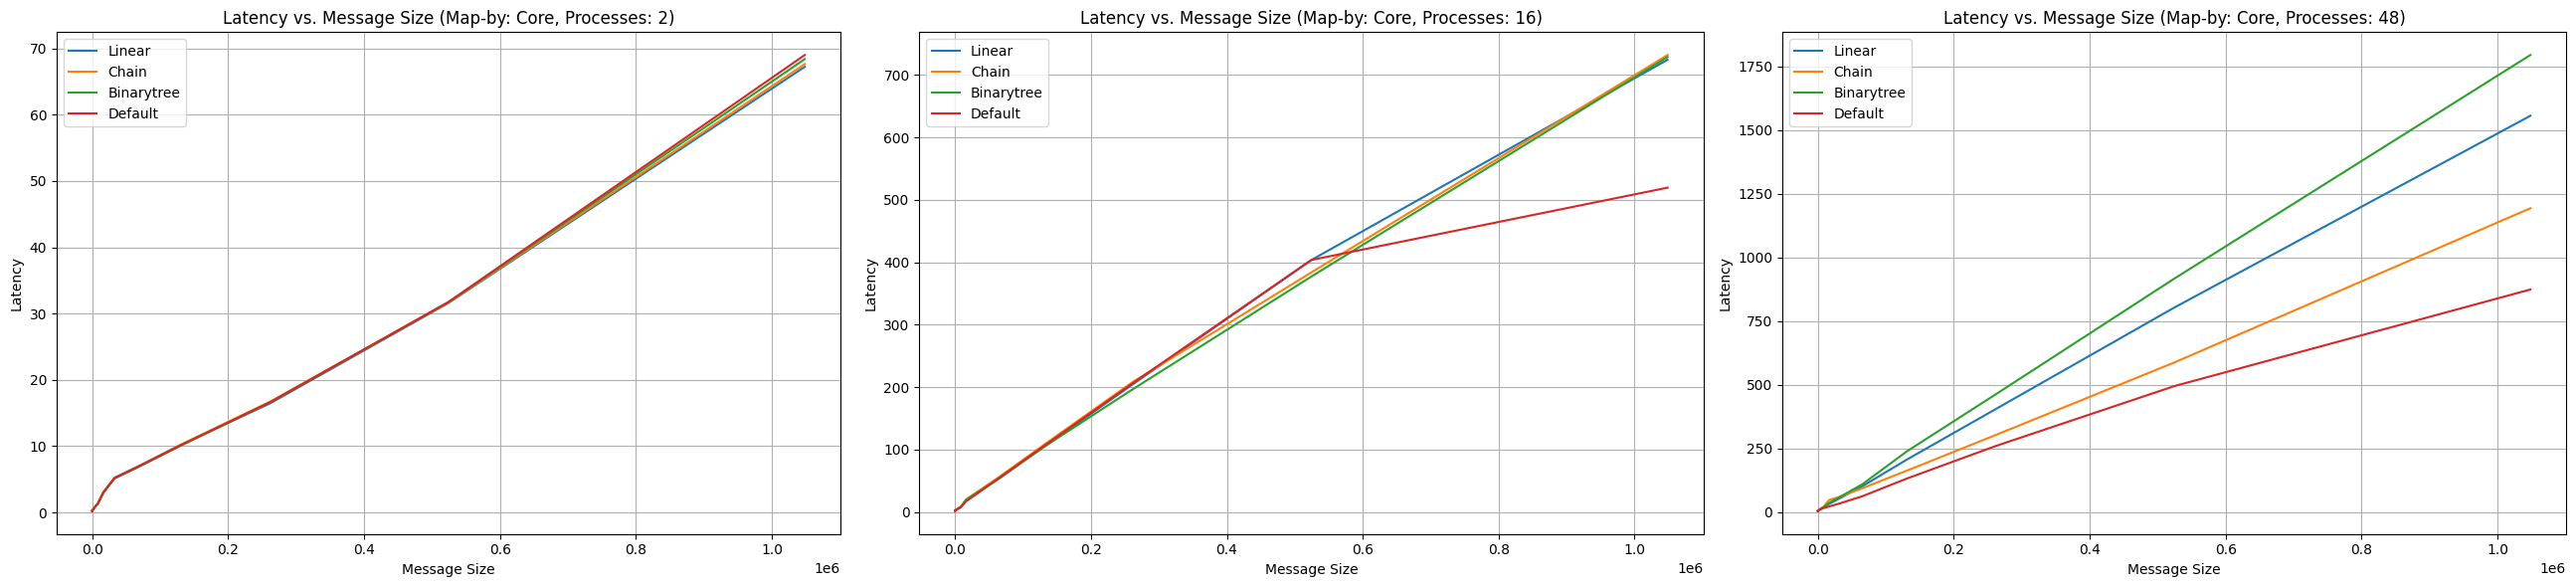

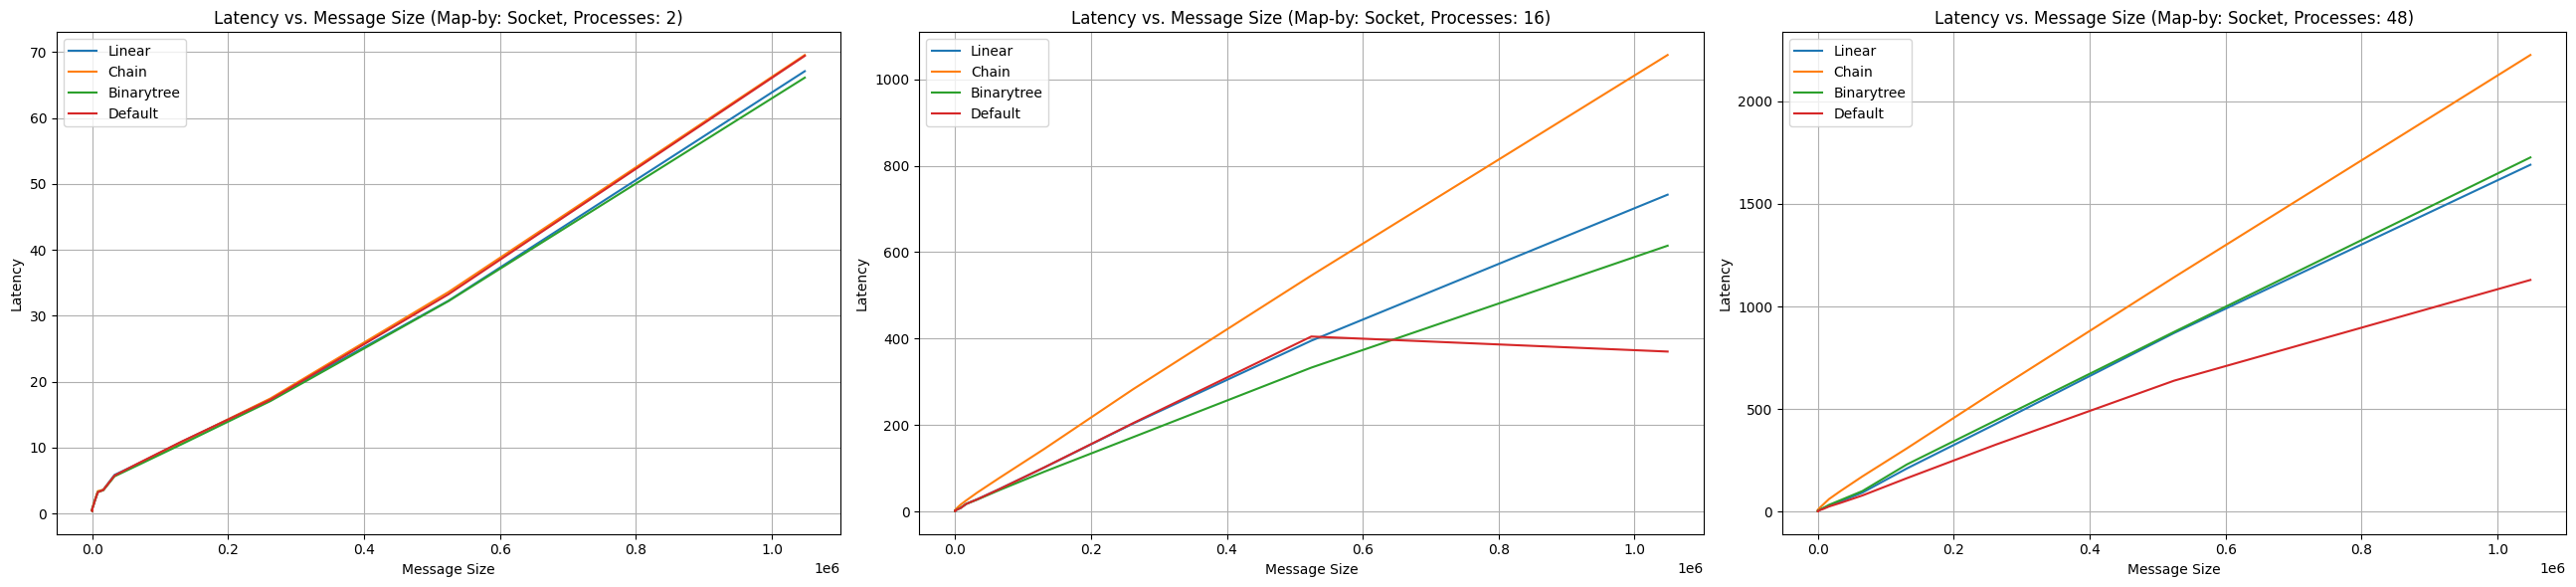

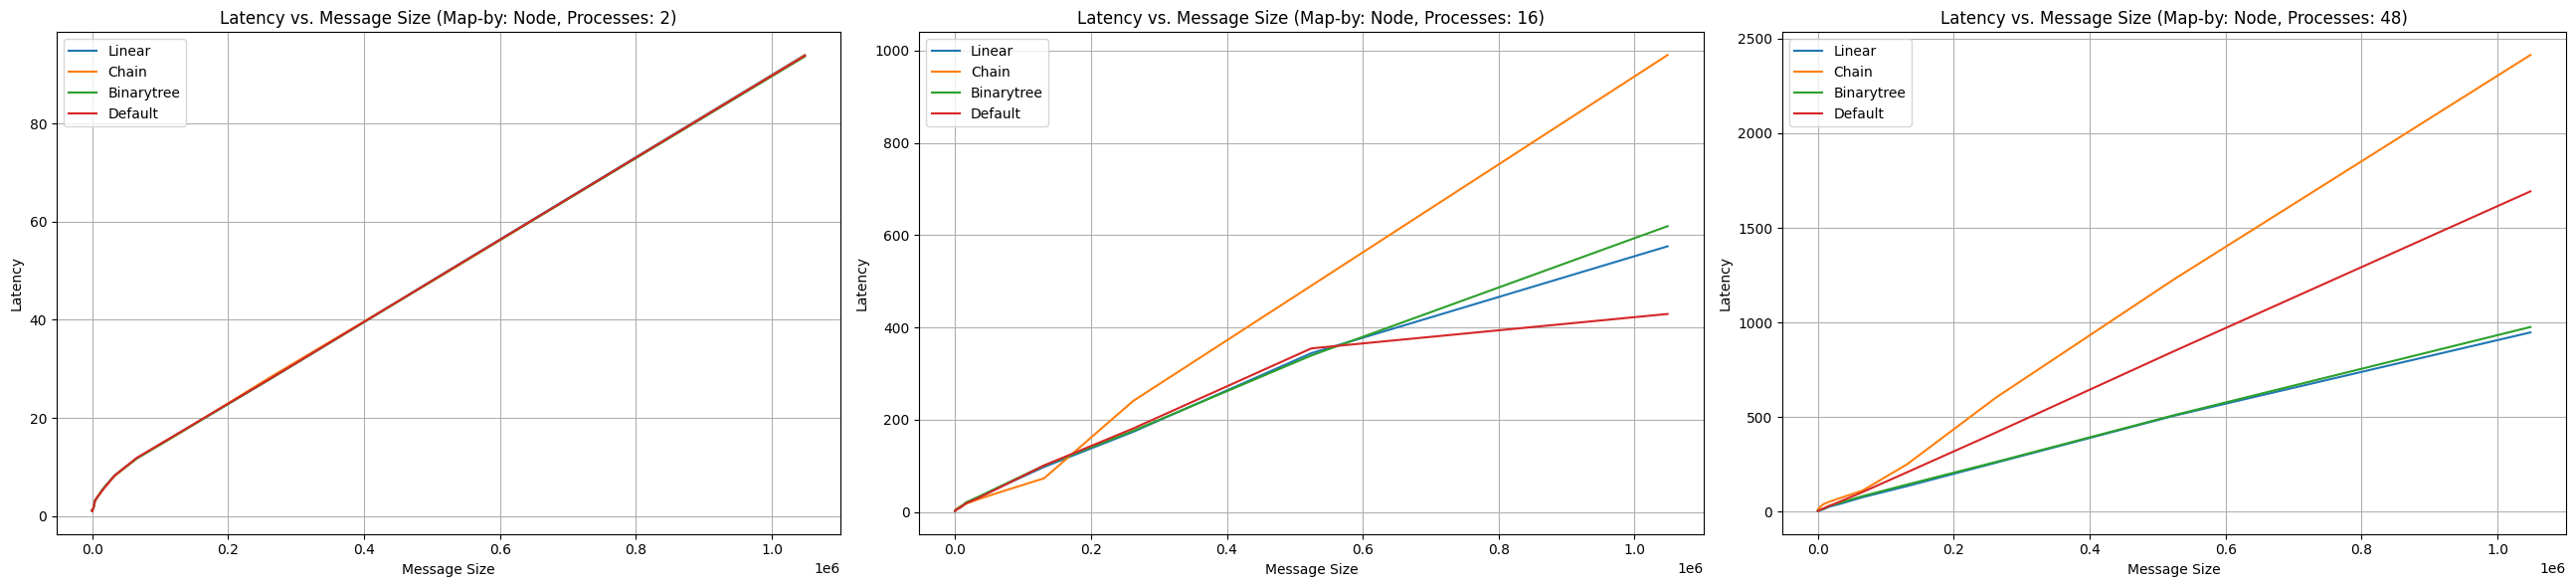

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(26, 6))
plt.sca(axs[0])
plot_latency_vs_message_size(algorithms, dfs, 'core', 2)
plt.sca(axs[1])
plot_latency_vs_message_size(algorithms, dfs, 'core', 16)
plt.sca(axs[2])
plot_latency_vs_message_size(algorithms, dfs, 'core', 48)
plt.tight_layout()
plt.savefig('figures/latency_size_core.png')
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(26, 6))
plt.sca(axs[0])
plot_latency_vs_message_size(algorithms, dfs, 'socket', 2)
plt.sca(axs[1])
plot_latency_vs_message_size(algorithms, dfs, 'socket', 16)
plt.sca(axs[2])
plot_latency_vs_message_size(algorithms, dfs, 'socket', 48)
plt.tight_layout()
plt.savefig('figures/latency_size_socket.png')
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(26, 6))
plt.sca(axs[0])
plot_latency_vs_message_size(algorithms, dfs, 'node', 2)
plt.sca(axs[1])
plot_latency_vs_message_size(algorithms, dfs, 'node', 16)
plt.sca(axs[2])
plot_latency_vs_message_size(algorithms, dfs, 'node', 48)
plt.tight_layout()
plt.savefig('figures/latency_size_node.png')
plt.show()

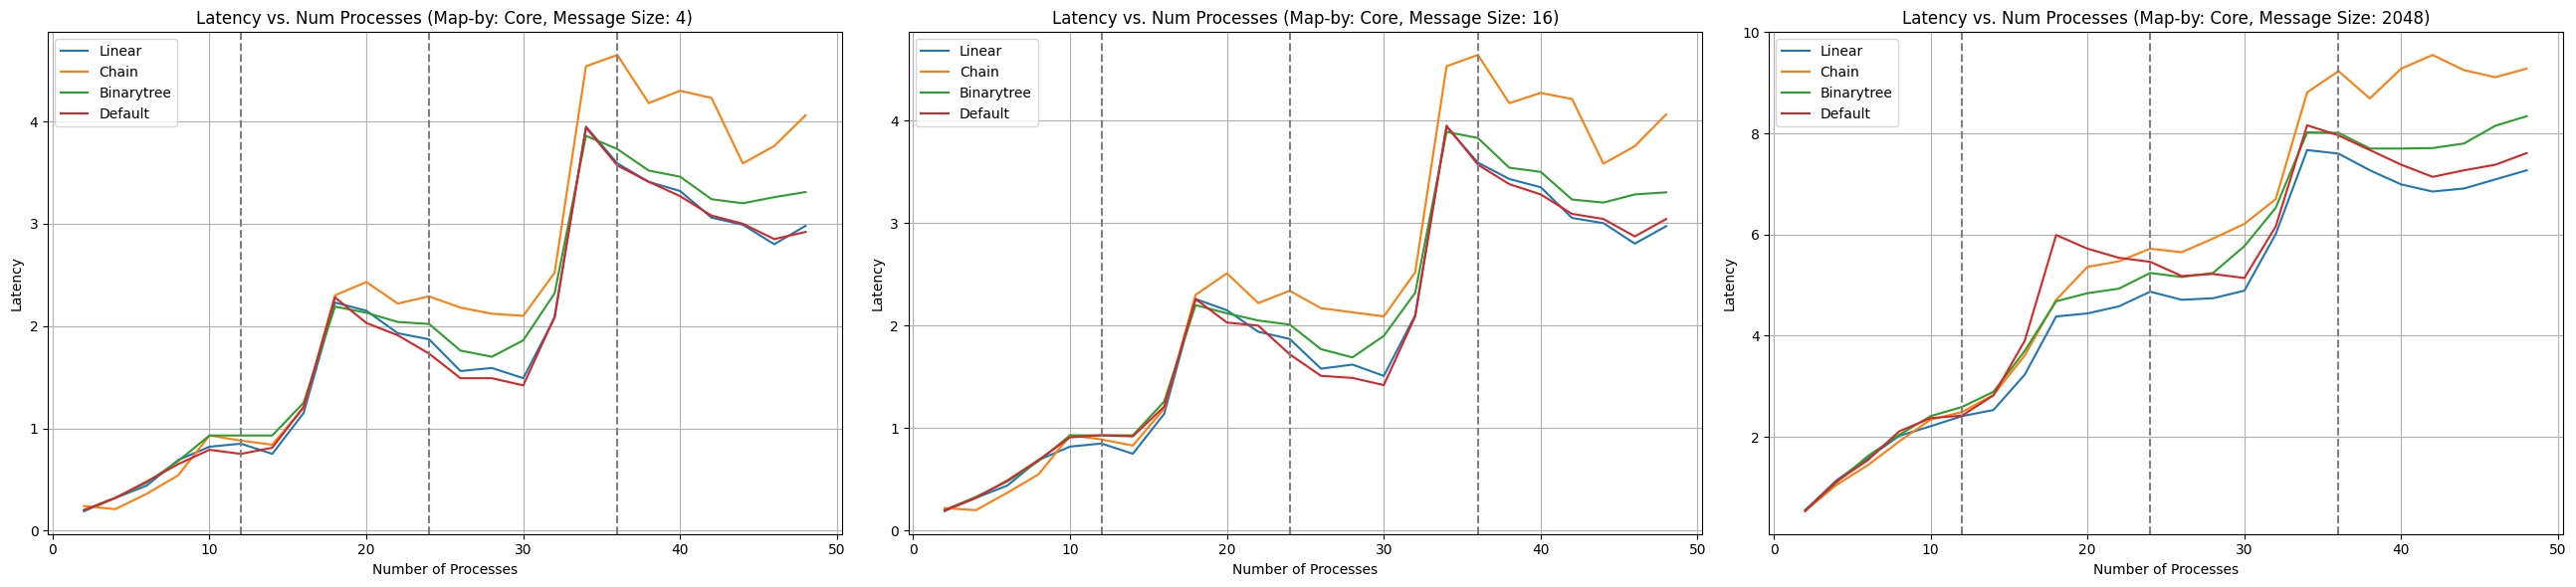

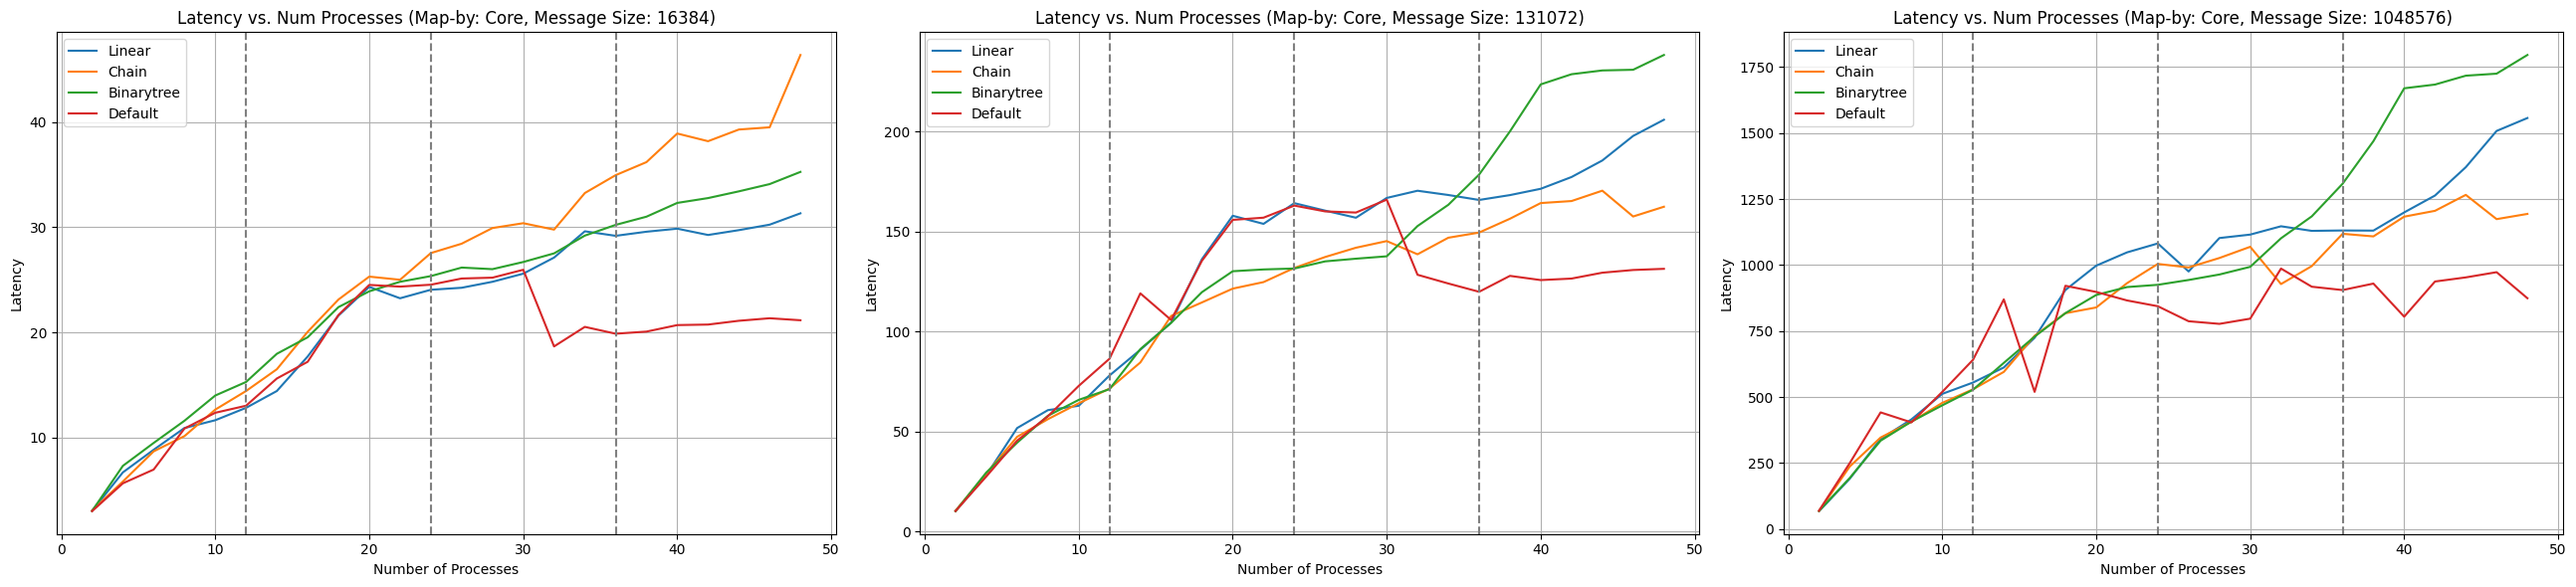

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(26, 6))
plt.sca(axs[0])
plot_latency_vs_processes(algorithms, dfs, 'core', 4)
plt.sca(axs[1])
plot_latency_vs_processes(algorithms, dfs, 'core', 16)
plt.sca(axs[2])
plot_latency_vs_processes(algorithms, dfs, 'core', 2048)
plt.tight_layout()
plt.savefig('figures/latency_proc_core_4.png')
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(26, 6))
plt.sca(axs[0])
plot_latency_vs_processes(algorithms, dfs, 'core', 16384)
plt.sca(axs[1])
plot_latency_vs_processes(algorithms, dfs, 'core', 131072)
plt.sca(axs[2])
plot_latency_vs_processes(algorithms, dfs, 'core', 1048576)
plt.tight_layout()
plt.savefig('figures/latency_proc_core_16.png')
plt.show()

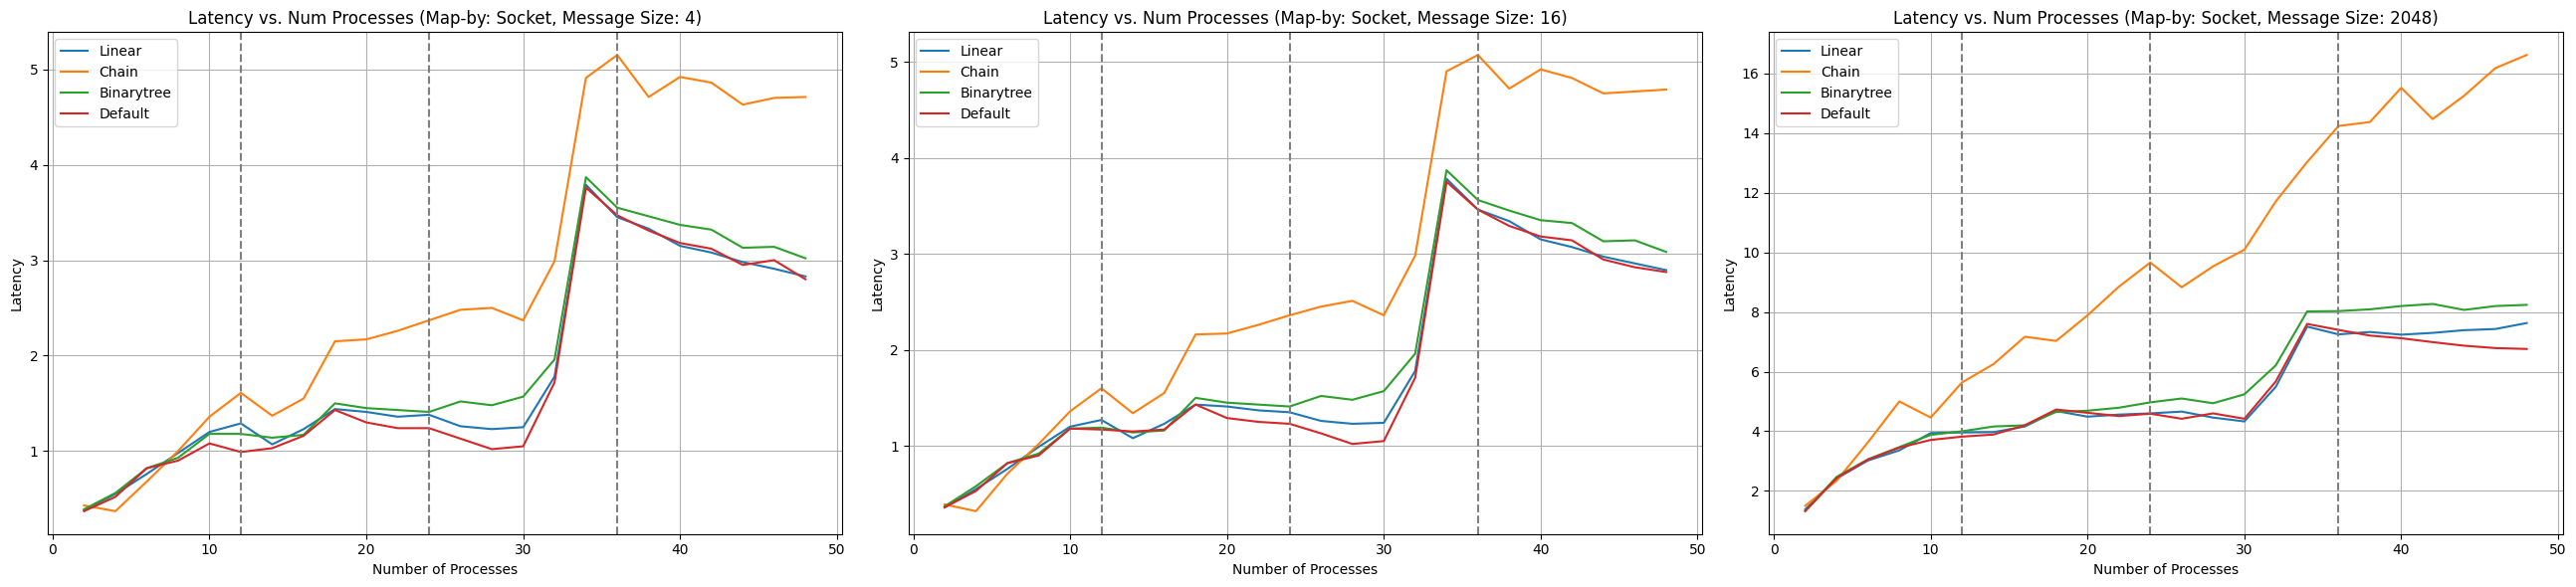

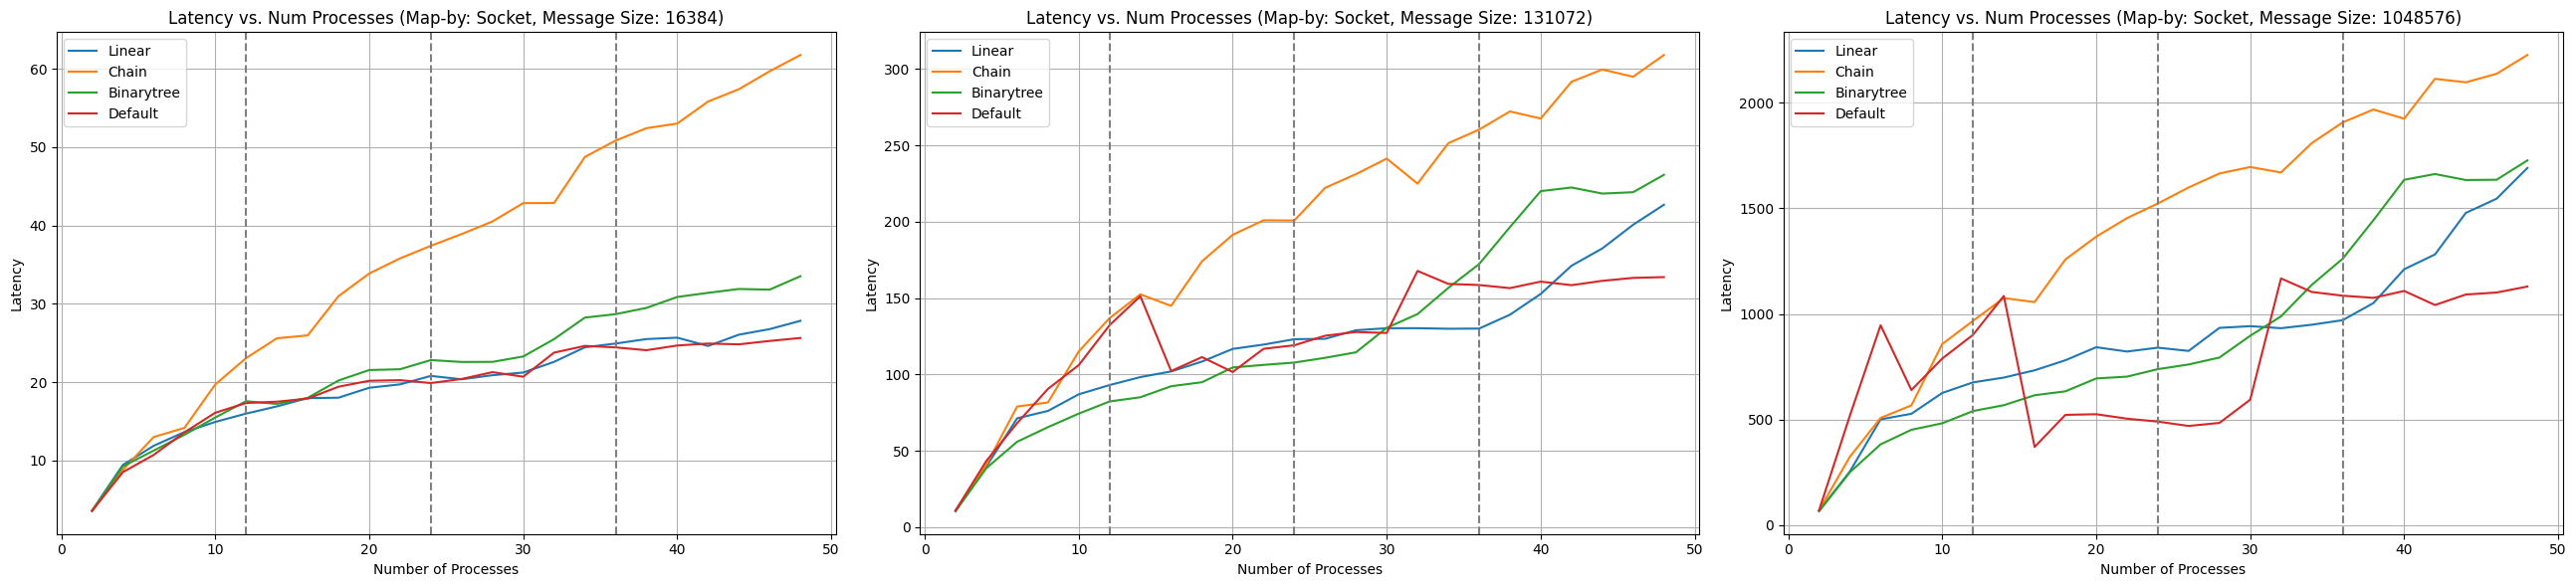

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(26, 6))
plt.sca(axs[0])
plot_latency_vs_processes(algorithms, dfs, 'socket', 4)
plt.sca(axs[1])
plot_latency_vs_processes(algorithms, dfs, 'socket', 16)
plt.sca(axs[2])
plot_latency_vs_processes(algorithms, dfs, 'socket', 2048)
plt.tight_layout()
plt.savefig('figures/latency_proc_socket_4.png')
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(26, 6))
plt.sca(axs[0])
plot_latency_vs_processes(algorithms, dfs, 'socket', 16384)
plt.sca(axs[1])
plot_latency_vs_processes(algorithms, dfs, 'socket', 131072)
plt.sca(axs[2])
plot_latency_vs_processes(algorithms, dfs, 'socket', 1048576)
plt.tight_layout()
plt.savefig('figures/latency_proc_socket_16.png')
plt.show()

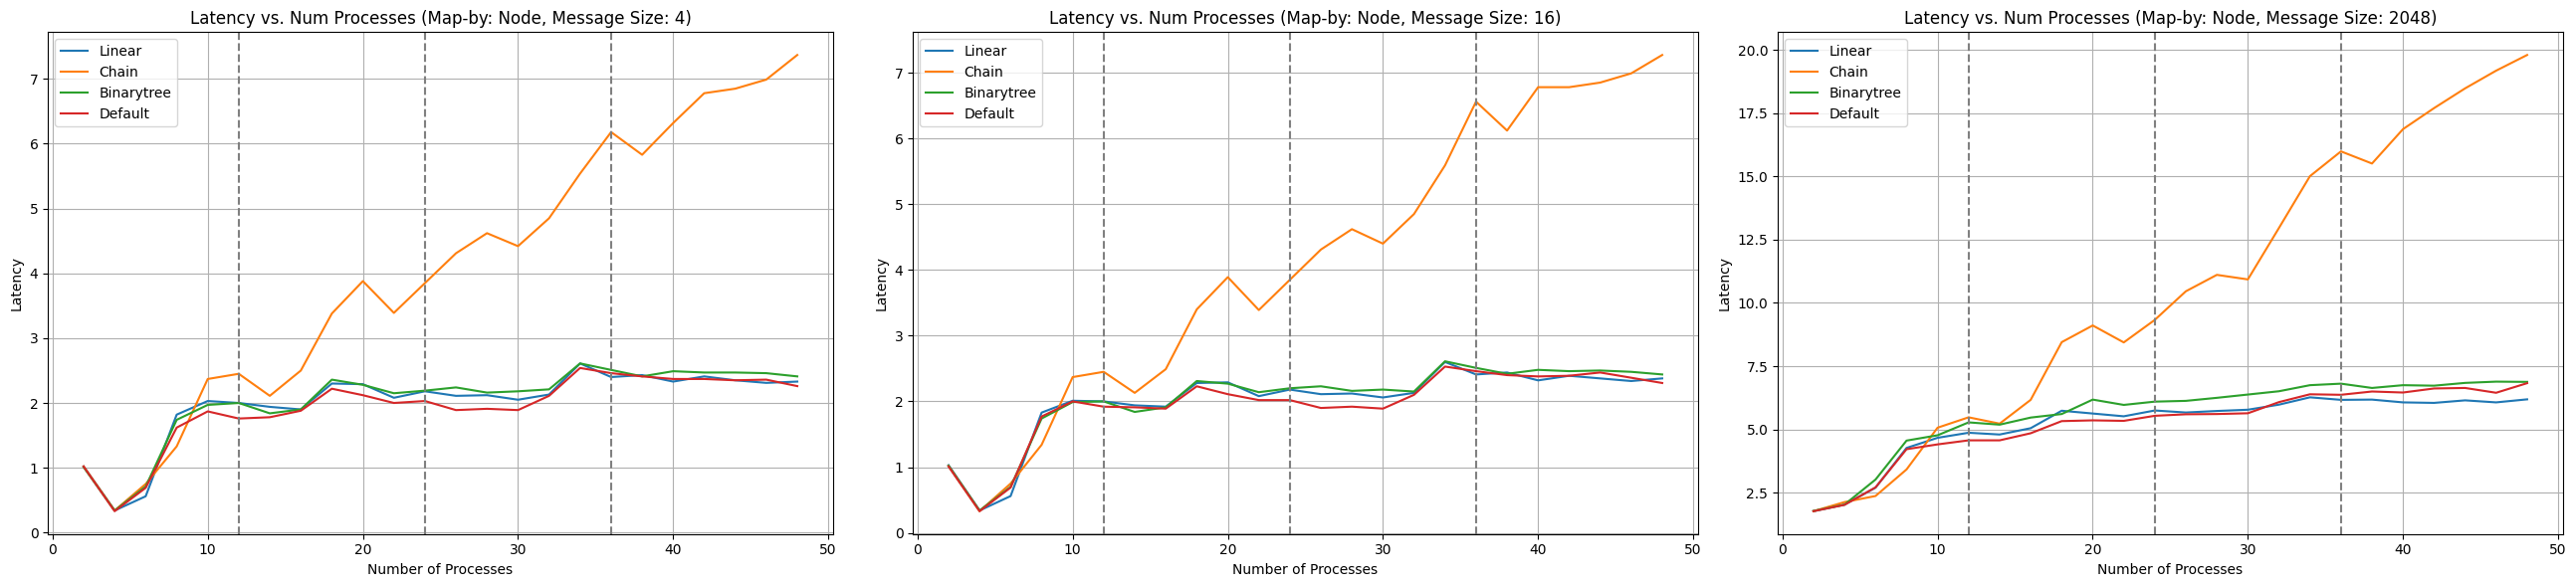

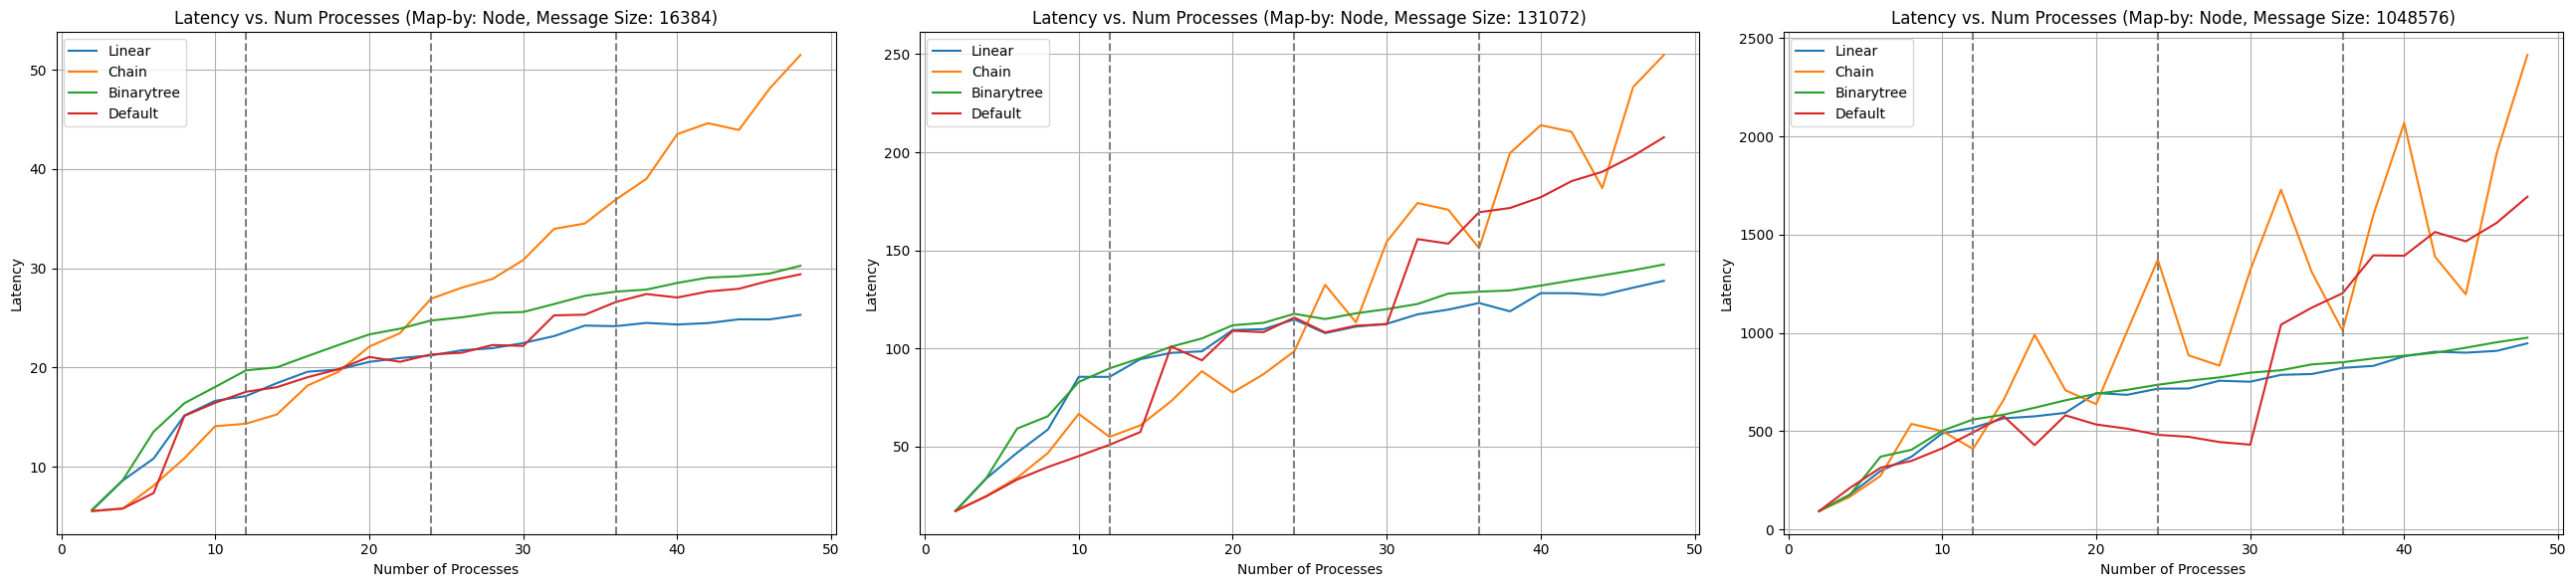

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(26, 6))
plt.sca(axs[0])
plot_latency_vs_processes(algorithms, dfs, 'node', 4)
plt.sca(axs[1])
plot_latency_vs_processes(algorithms, dfs, 'node', 16)
plt.sca(axs[2])
plot_latency_vs_processes(algorithms, dfs, 'node', 2048)
plt.tight_layout()
plt.savefig('figures/latency_proc_node_4.png')
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(26, 6))
plt.sca(axs[0])
plot_latency_vs_processes(algorithms, dfs, 'node', 16384)
plt.sca(axs[1])
plot_latency_vs_processes(algorithms, dfs, 'node', 131072)
plt.sca(axs[2])
plot_latency_vs_processes(algorithms, dfs, 'node', 1048576)
plt.tight_layout()
plt.savefig('figures/latency_proc_node_16.png')
plt.show()

Since binary_tree and linear behave similarly, I decided to keep only the linear algorithm to compare with default and chain

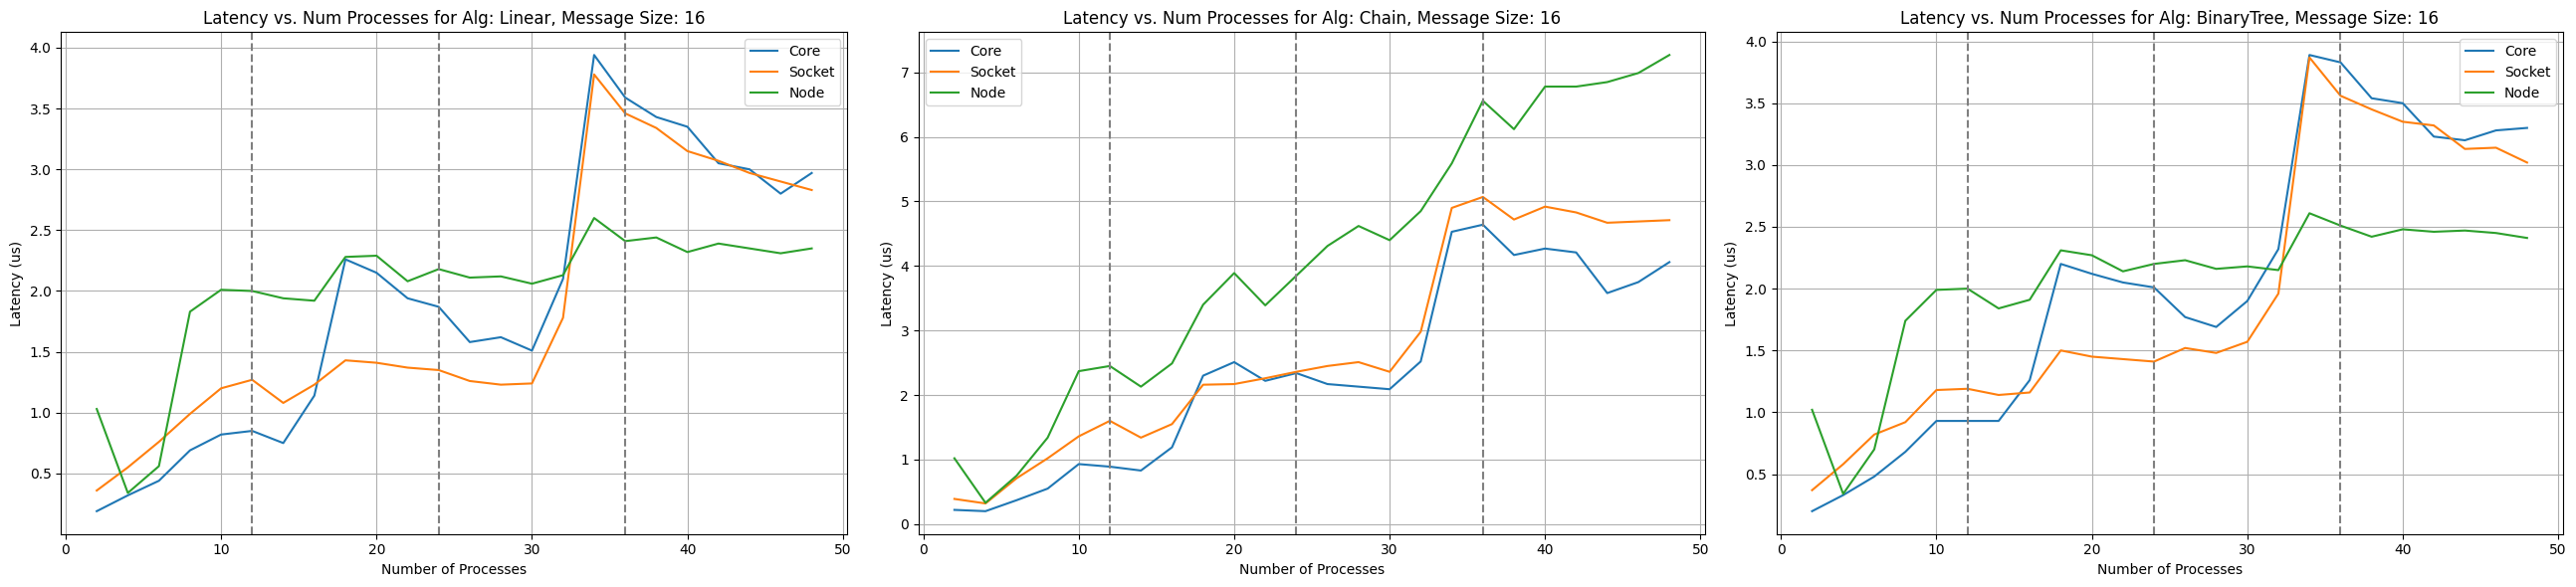

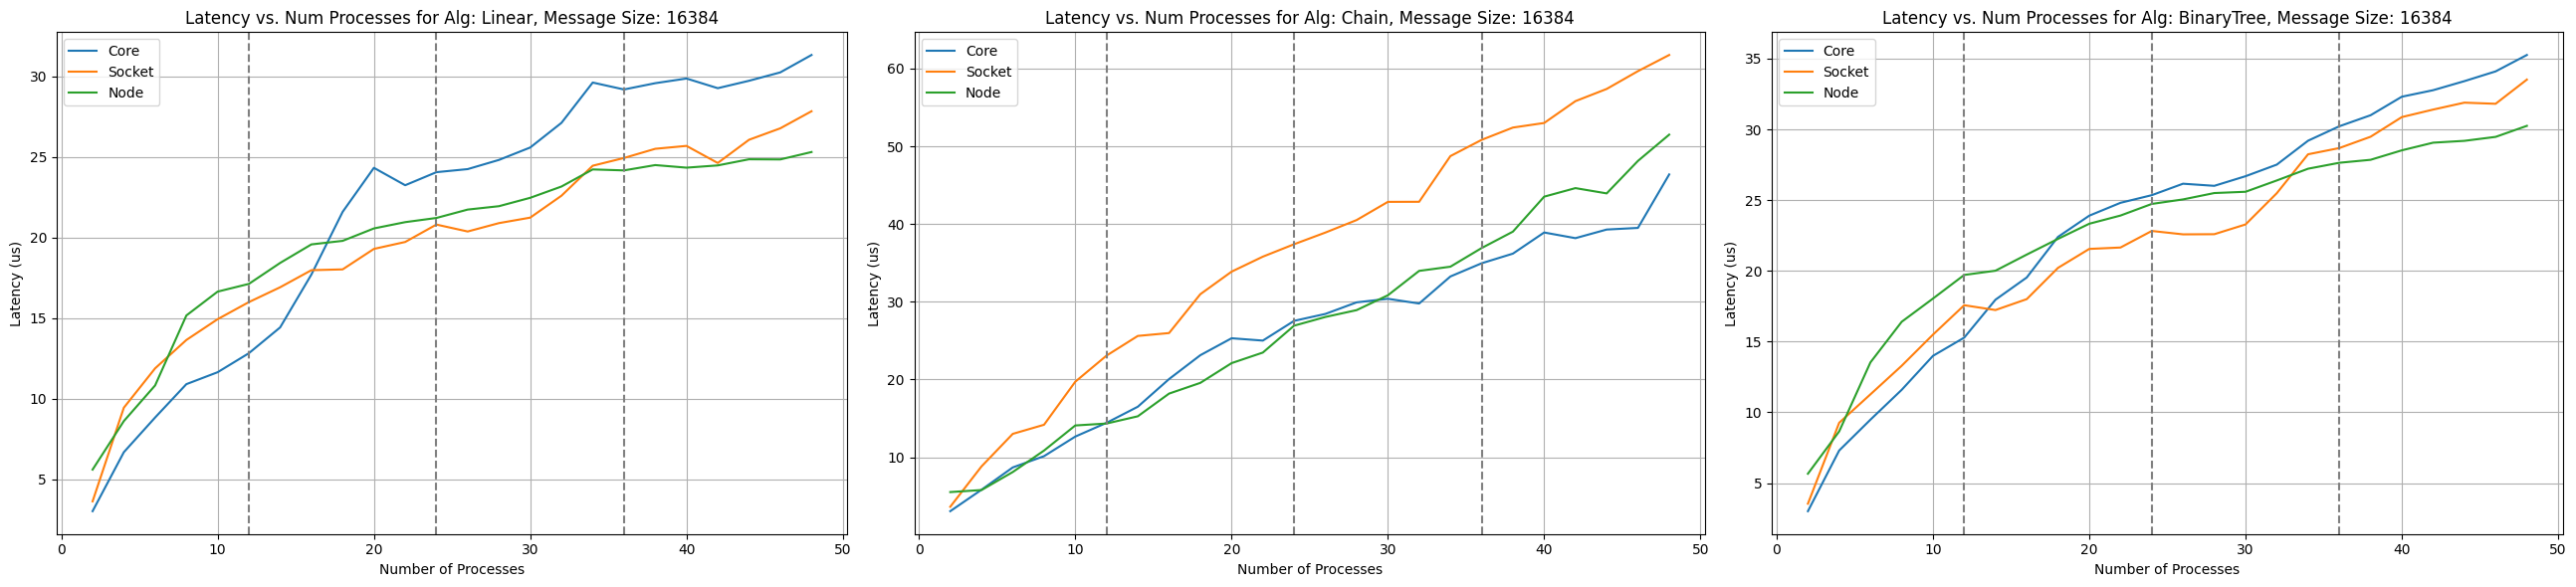

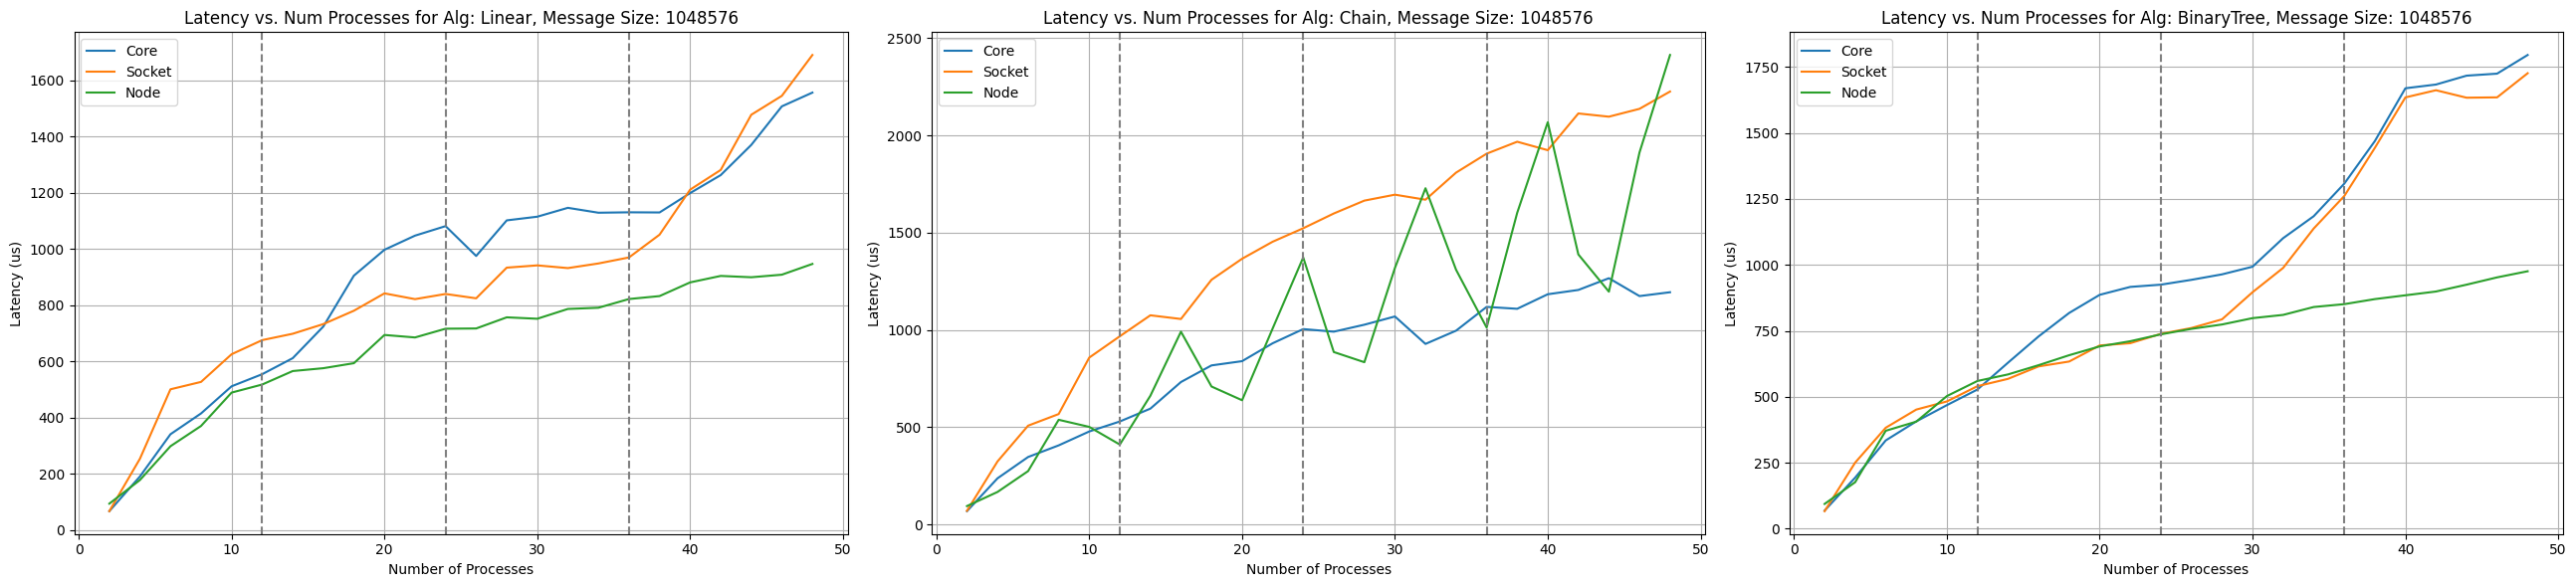

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(26, 6))
plt.sca(axs[0])
plot_latency_vs_processes_fixed_alg(bcast_linear,'Linear', 16, allocations)
plt.sca(axs[1])
plot_latency_vs_processes_fixed_alg(bcast_chain,'Chain', 16, allocations)
plt.sca(axs[2])
plot_latency_vs_processes_fixed_alg(bcast_binarytree,'BinaryTree', 16, allocations)
plt.tight_layout()
plt.savefig('figures/latency_proc_1.png')
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(26, 6))
plt.sca(axs[0])
plot_latency_vs_processes_fixed_alg(bcast_linear,'Linear', 16384, allocations)
plt.sca(axs[1])
plot_latency_vs_processes_fixed_alg(bcast_chain,'Chain', 16384, allocations)
plt.sca(axs[2])
plot_latency_vs_processes_fixed_alg(bcast_binarytree,'BinaryTree', 16384, allocations)
plt.tight_layout()
plt.savefig('figures/latency_proc_16.png')
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(26, 6))
plt.sca(axs[0])
plot_latency_vs_processes_fixed_alg(bcast_linear,'Linear', 1048576, allocations)
plt.sca(axs[1])
plot_latency_vs_processes_fixed_alg(bcast_chain,'Chain', 1048576, allocations)
plt.sca(axs[2])
plot_latency_vs_processes_fixed_alg(bcast_binarytree,'BinaryTree', 1048576, allocations)
plt.tight_layout()
plt.savefig('./figures/latency_proc_104.png')
plt.show()

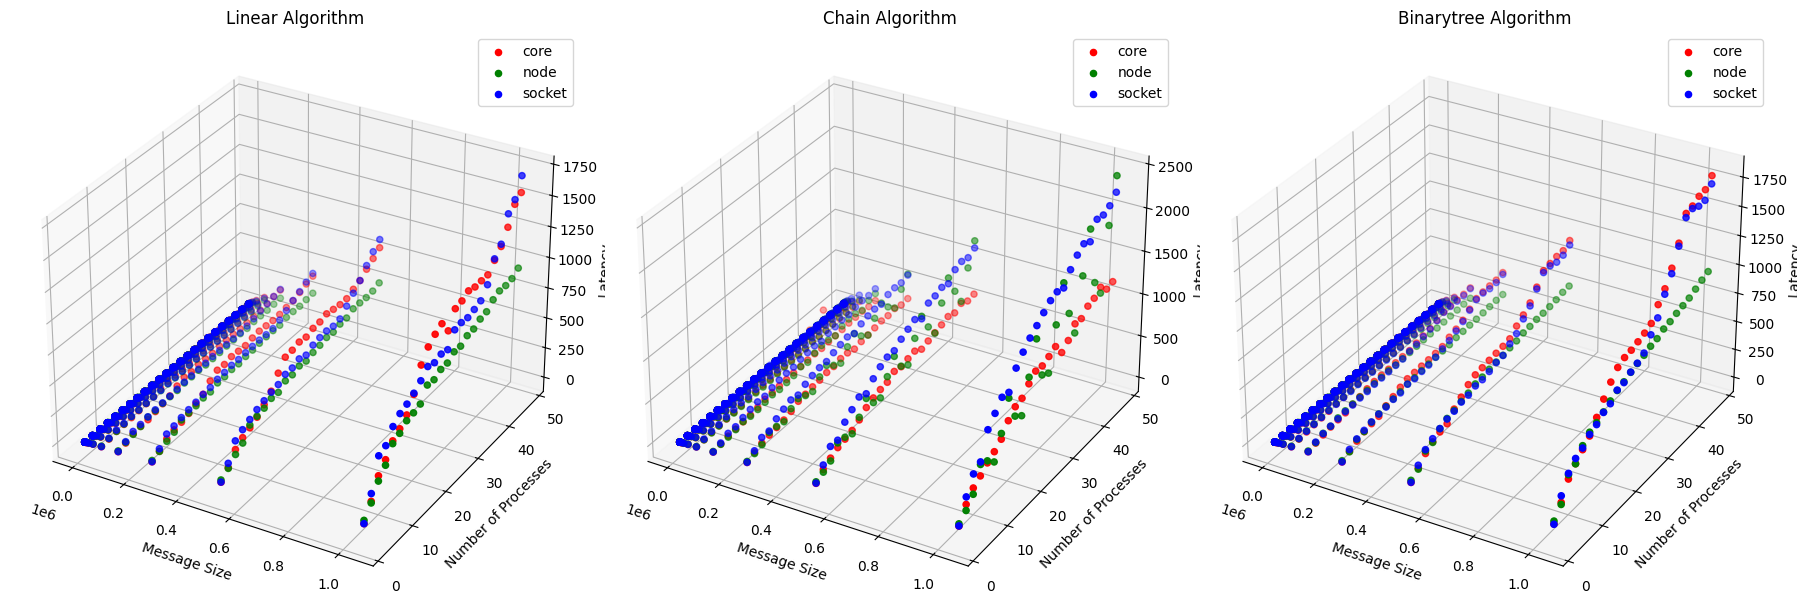

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

for ax, algorithm, df in zip(axs.flatten(), algorithms, dfs):
    for allocation, color in zip(['core', 'node', 'socket'], ['r', 'g', 'b']):
        df_allocation = df[df['Allocation'] == allocation]
        ax.scatter(df_allocation['MessageSize'], df_allocation['Processes'], df_allocation['Latency'], c=color, label=allocation, marker='o')

    ax.set_xlabel('Message Size')
    ax.set_ylabel('Number of Processes')
    ax.set_zlabel('Latency')
    ax.set_title(f'{algorithm} Algorithm')
    ax.legend()

plt.tight_layout()
plt.show()

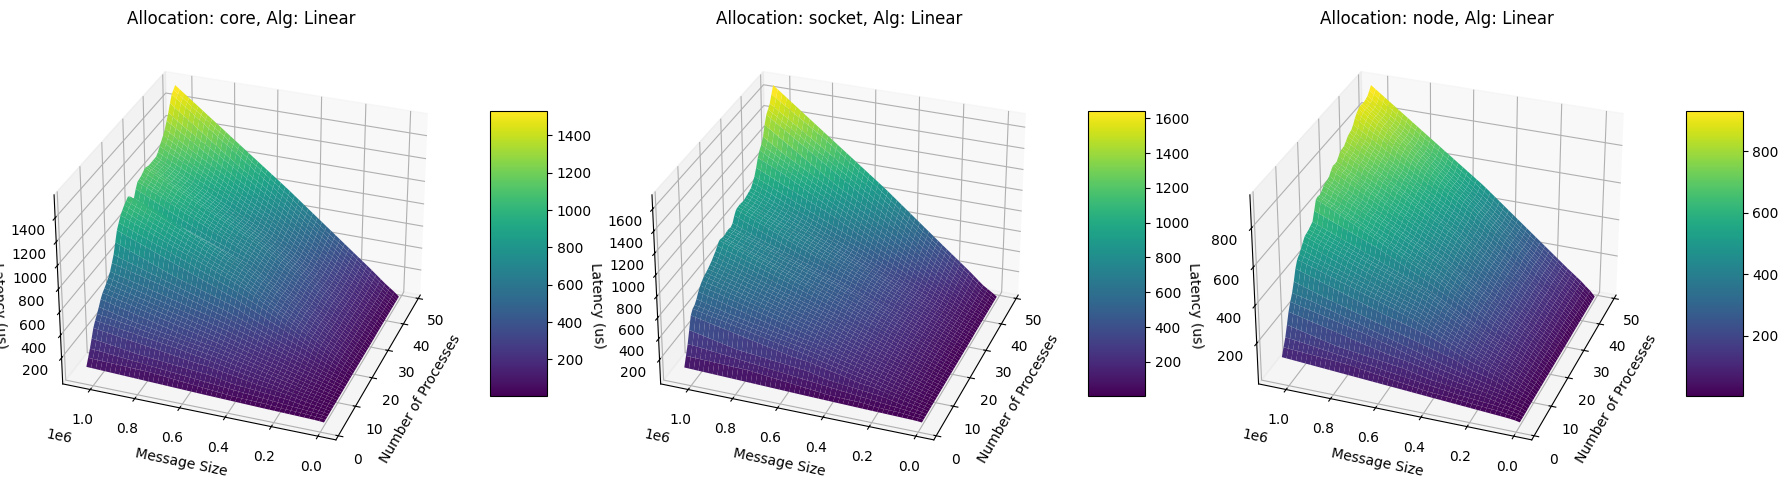

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})
plot_3d_latency(bcast_linear, 'core', axs[0], 'Linear')
plot_3d_latency(bcast_linear, 'socket', axs[1], 'Linear')
plot_3d_latency(bcast_linear, 'node', axs[2], 'Linear')
plt.tight_layout()
plt.savefig('figures/3d_latency_linear.png')
plt.show()

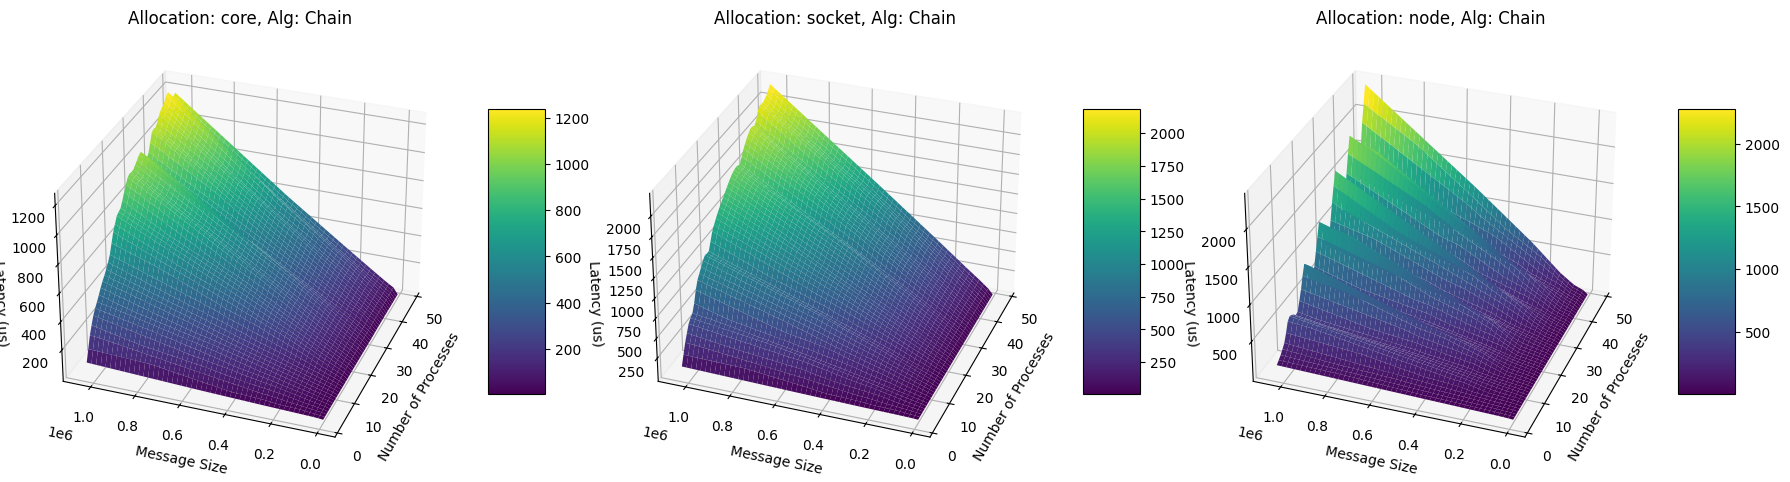

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})
plot_3d_latency(bcast_chain, 'core', axs[0], 'Chain')
plot_3d_latency(bcast_chain, 'socket', axs[1], 'Chain')
plot_3d_latency(bcast_chain, 'node', axs[2], 'Chain')
plt.tight_layout()
plt.savefig('figures/3d_latency_chain.png')
plt.show()

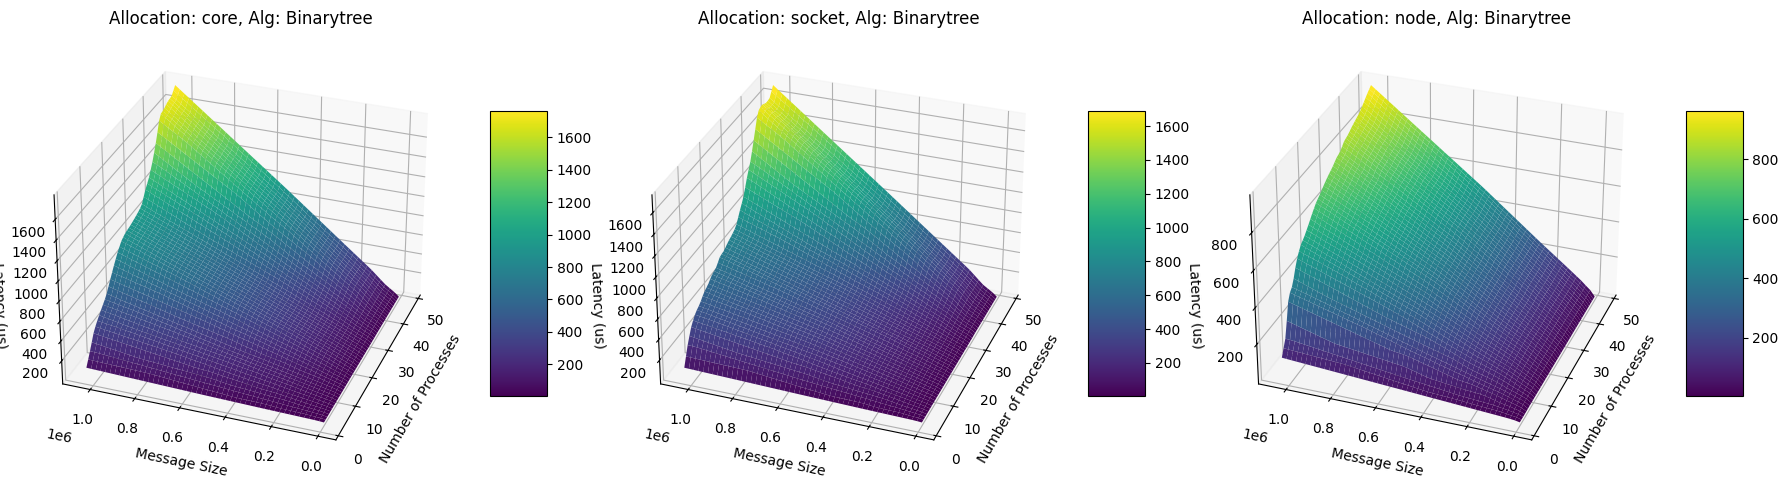

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})
plot_3d_latency(bcast_binarytree, 'core', axs[0], 'Binarytree')
plot_3d_latency(bcast_binarytree, 'socket', axs[1], 'Binarytree')
plot_3d_latency(bcast_binarytree, 'node', axs[2], 'Binarytree')
plt.tight_layout()
plt.savefig('figures/3d_latency_binarytree.png')
plt.show()

# Comparison of default between other algorithms

In [18]:
dfs = [bcast_linear, bcast_chain, bcast_binarytree]

def compare_default(df_default, dfs, allocation, message_size, processes):

    df_default_filtered = df_default[
        (df_default['Allocation'] == allocation) & 
        (df_default['MessageSize'] == message_size) & 
        (df_default['Processes'] == processes)
    ]
    
    if not df_default_filtered.empty:
        latency_default = df_default_filtered['Latency'].values[0]
    else:
        return None, None, None, None

    min_latency = float('inf')
    best_algorithm = None 
    
    for df, algo_name in zip(dfs, ['Linear', 'Chain', 'Binary Tree']):
        df_filtered = df[
            (df['Allocation'] == allocation) & 
            (df['MessageSize'] == message_size) & 
            (df['Processes'] == processes)
        ]
        if not df_filtered.empty:
            min_lat_algo = df_filtered['Latency'].min()
            if min_lat_algo < min_latency:
                min_latency = min_lat_algo
                best_algorithm = algo_name
    
    return latency_default, min_latency, best_algorithm, 0 if min_latency < latency_default else 1

In [19]:
results_list = []

for allocation in ['core', 'socket', 'node']:
    for message_size in [2**i for i in range(0, 21, 1)]:
        count = 0
        count_chain = 0
        count_linear = 0
        count_binarytree = 0
        for processes in range(2, 49, 2):
            latency_default, min_latency, best_algorithm, optimal = compare_default(bcast_default, dfs, allocation, message_size, processes)
            if optimal is not None:
                count += optimal
            if best_algorithm == 'Chain' and optimal == 0:
                count_chain += 1
            if best_algorithm == 'Linear' and optimal == 0:
                count_linear += 1
            if best_algorithm == 'Binary Tree' and optimal == 0:
                count_binarytree += 1

        results_list.append({
            'Allocation': allocation,
            'MessageSize': message_size,
            'Default_Is_Optimal': count,
            'Chain_Is_Optimal': count_chain,
            'Linear_Is_Optimal': count_linear,
            'Binarytree_Is_Optimal': count_binarytree
        })

results_df_fixed_size = pd.DataFrame(results_list)
results_df_fixed_size.to_csv('comparison_fixed_size.csv', index=False)

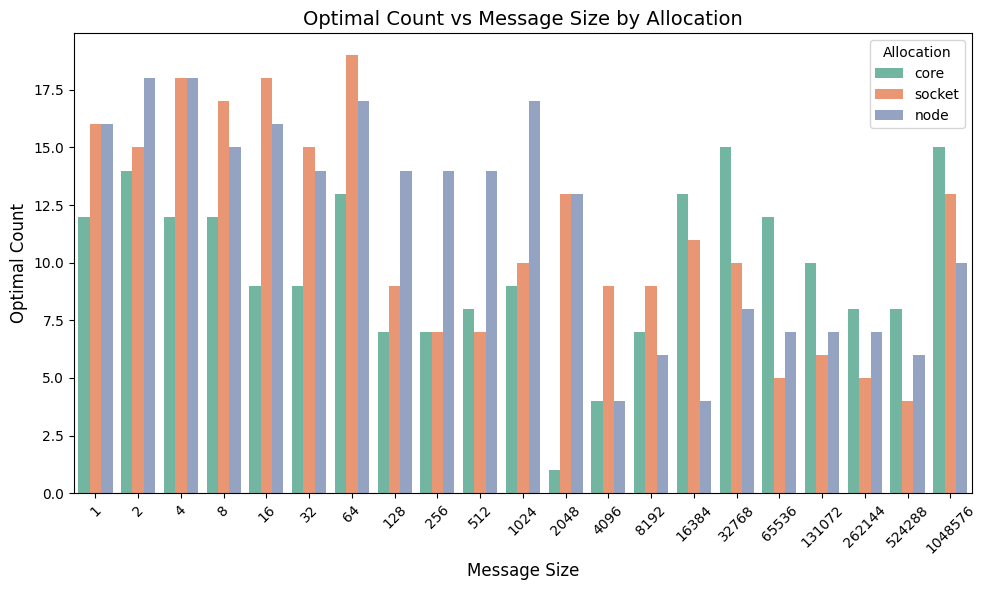

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='MessageSize', y='Default_Is_Optimal', hue='Allocation', data=results_df_fixed_size, palette='Set2')
plt.xlabel('Message Size', fontsize=12)
plt.ylabel('Optimal Count', fontsize=12)
plt.title('Optimal Count vs Message Size by Allocation', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

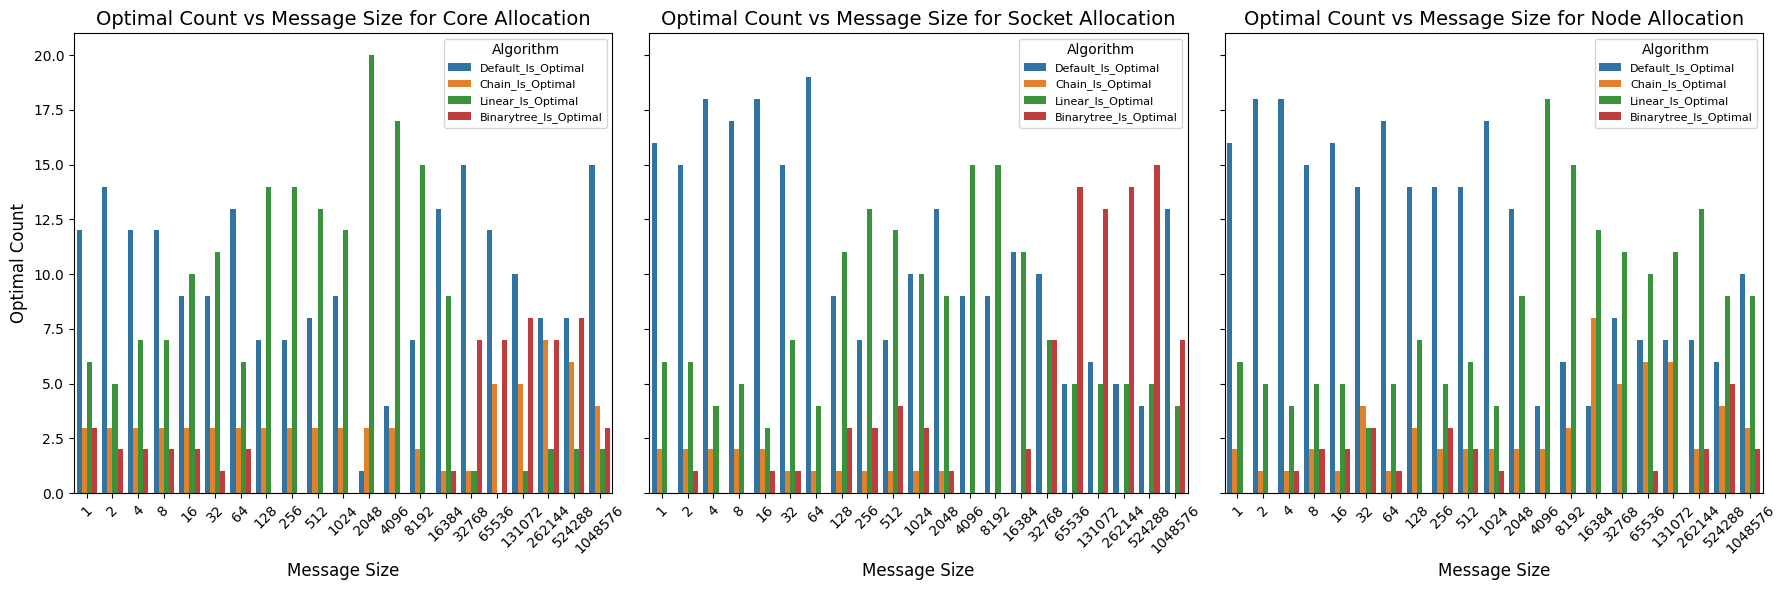

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
allocations = ['core', 'socket', 'node']
for ax, allocation in zip(axes, allocations):
    results_alloc = results_df_fixed_size[results_df_fixed_size['Allocation'] == allocation]
    custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    results_melted = results_alloc.melt(id_vars=['MessageSize'], 
                                         value_vars=['Default_Is_Optimal', 'Chain_Is_Optimal', 'Linear_Is_Optimal', 'Binarytree_Is_Optimal'],
                                         var_name='Algorithm',
                                         value_name='Optimal_Count')

    sns.barplot(x='MessageSize', y='Optimal_Count', hue='Algorithm', data=results_melted, palette=custom_palette, ax=ax)

    ax.set_title(f'Optimal Count vs Message Size for {allocation.capitalize()} Allocation', fontsize=14)
    ax.set_xlabel('Message Size', fontsize=12)
    ax.set_ylabel('Optimal Count', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Algorithm', fontsize=8, loc='upper right')

plt.tight_layout()
plt.savefig('figures/optimal_count_size.png')
plt.show()

In [22]:
results_list = []

for allocation in ['core', 'socket', 'node']:
    for processes in range(2, 49, 2):
        count = 0
        count_chain = 0
        count_linear = 0
        count_binarytree = 0
        for message_size in [2**i for i in range(0, 21, 1)]:
            latency_default, min_latency, best_algorithm, optimal = compare_default(bcast_default, dfs, allocation, message_size, processes)
        
            if optimal is not None:
                count += optimal
            if best_algorithm == 'Chain' and optimal == 0:
                count_chain += 1
            if best_algorithm == 'Linear' and optimal == 0:
                count_linear += 1
            if best_algorithm == 'Binary Tree' and optimal == 0:
                count_binarytree += 1

        results_list.append({
            'Allocation': allocation,
            'Processes': processes,
            'Default_Is_Optimal': count,
            'Chain_Is_Optimal': count_chain,
            'Linear_Is_Optimal': count_linear,
            'Binarytree_Is_Optimal': count_binarytree
        })

results_df_fixed_proc = pd.DataFrame(results_list)
results_df_fixed_proc.to_csv('comparison_fixed_proc.csv', index=False)

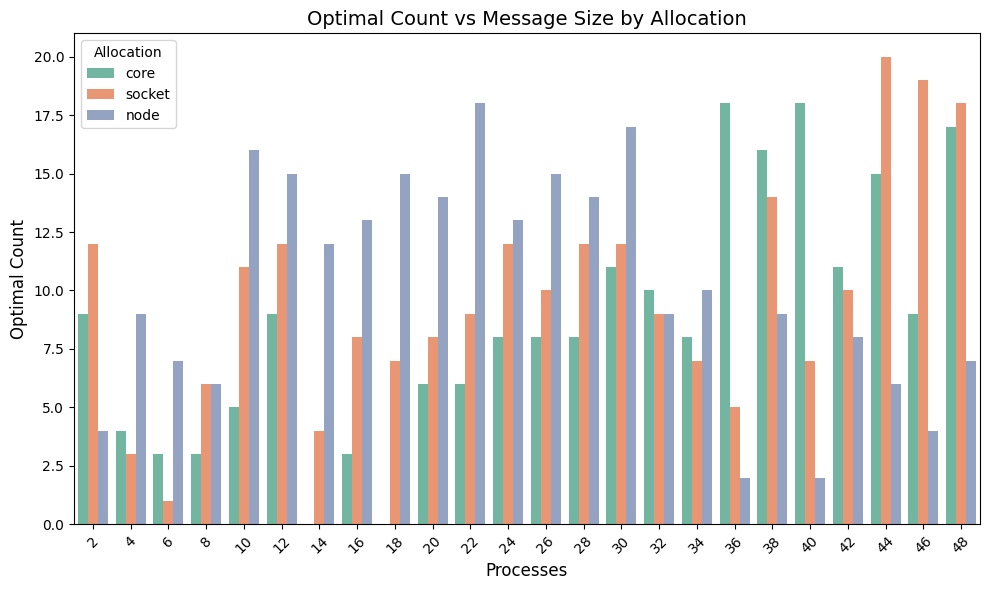

In [23]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Processes', y='Default_Is_Optimal', hue='Allocation', data=results_df_fixed_proc, palette='Set2')
plt.xlabel('Processes', fontsize=12)
plt.ylabel('Optimal Count', fontsize=12)
plt.title('Optimal Count vs Message Size by Allocation', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

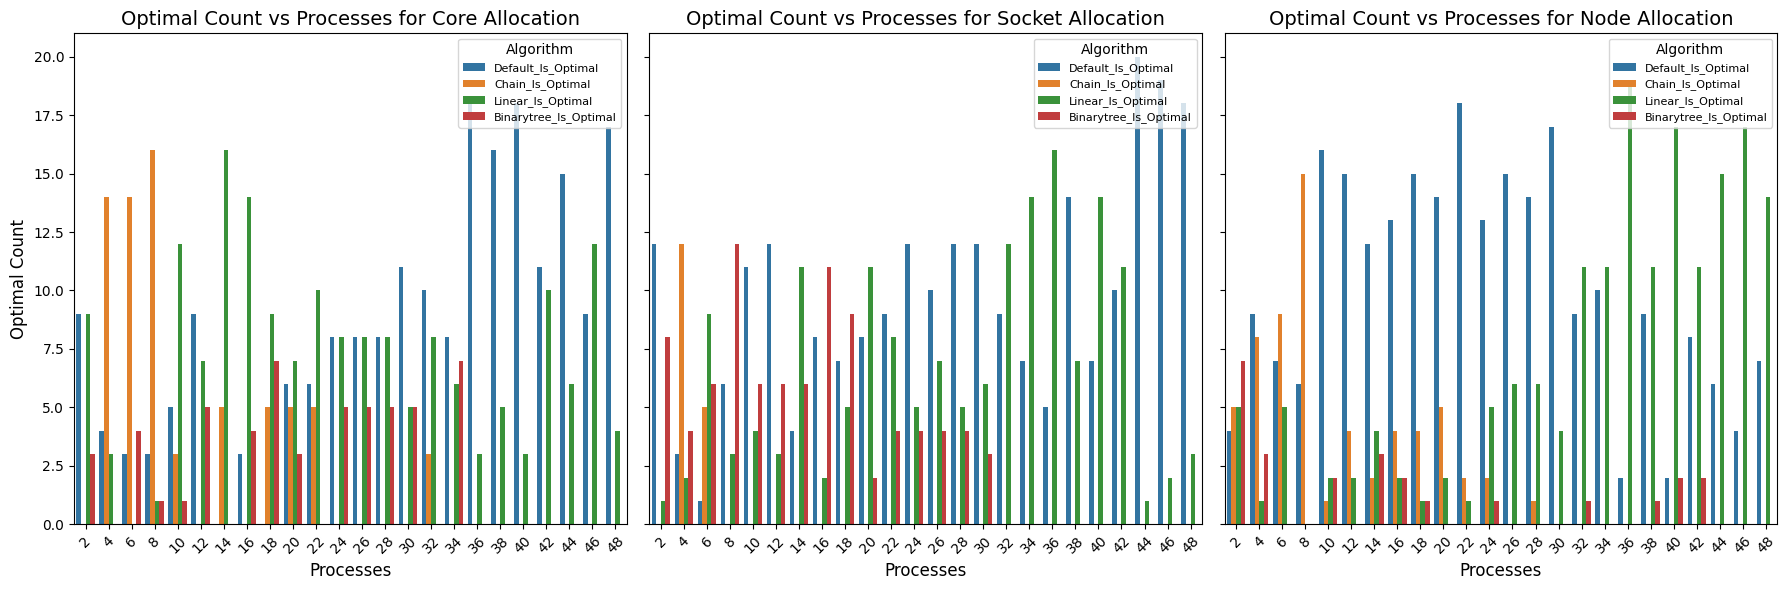

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

allocations = ['core', 'socket', 'node']
for ax, allocation in zip(axes, allocations):
    results_alloc = results_df_fixed_proc[results_df_fixed_proc['Allocation'] == allocation]

    results_melted = results_alloc.melt(id_vars=['Processes'], 
                                         value_vars=['Default_Is_Optimal', 'Chain_Is_Optimal', 'Linear_Is_Optimal', 'Binarytree_Is_Optimal'],
                                         var_name='Algorithm',
                                         value_name='Optimal_Count')
    custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    sns.barplot(x='Processes', y='Optimal_Count', hue='Algorithm', data=results_melted, palette=custom_palette, ax=ax)
    ax.set_title(f'Optimal Count vs Processes for {allocation.capitalize()} Allocation', fontsize=14)
    ax.set_xlabel('Processes', fontsize=12)
    ax.set_ylabel('Optimal Count', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Algorithm', fontsize=8, loc='upper right')

plt.tight_layout()
plt.savefig('figures/optimal_count_proc.png')
plt.show()

## Grouped comparison

In [25]:
dfs = [bcast_linear, bcast_chain, bcast_binarytree]

def compare_default(df_default, dfs, allocation, message_size, processes):
    df_default_filtered = df_default[
        (df_default['Allocation'] == allocation) & 
        (df_default['MessageSize'] == message_size) & 
        (df_default['Processes'] == processes)
    ]
    if not df_default_filtered.empty:
        latency_default = df_default_filtered['Latency'].values[0]
    else:
        return None, None, None, None
    
    min_latency = float('inf')
    best_algorithm = None
    
    for df, algo_name in zip(dfs, ['Linear', 'Chain', 'Binary Tree']):
        df_filtered = df[
            (df['Allocation'] == allocation) & 
            (df['MessageSize'] == message_size) & 
            (df['Processes'] == processes)
        ]
        if not df_filtered.empty:
            min_lat_algo = df_filtered['Latency'].min()
            if min_lat_algo < min_latency:
                min_latency = min_lat_algo
                best_algorithm = algo_name

    return latency_default, min_latency, best_algorithm, 0 if min_latency < latency_default else 1

In [26]:
sizes = {'small_sizes': [2**i for i in range(0, 7)], 'medium_sizes': [2**i for i in range(7, 14)], 'large_sizes': [2**i for i in range(14, 21)]}
procs = {'few_processes': [2*i for i in range(1, 9)], 'many_processes': [2*i for i in range(9, 17)], 'many_many_processes': [2*i for i in range(17, 25)]}

results_list = []
for allocation in ['core', 'socket', 'node']:
    for size_name, size_values in sizes.items():
        for process_name, process_values in procs.items():
            count_optimal = 0
            diff_list = []
            for message_size in size_values:
                for processes in process_values:
                    latency_default, min_latency, best_algorithm, optimal = compare_default(bcast_default, dfs, allocation, message_size, processes)
                    count_optimal += optimal
                    diff = latency_default - min_latency
                    diff_list.append(diff)

            diff_array = np.array(diff_list)
            if optimal is not None:
                results_list.append({
                    'Allocation': allocation,
                    'MessageSize': size_name,
                    'Processes': process_name,
                    'Optimal_Count': count_optimal,
                    'Mean_Difference': diff_array.mean(),
                    'Std_Difference': diff_array.std()
                })

In [27]:
results_df = pd.DataFrame(results_list)
display(results_df)
results_df.to_csv('comparison.csv', index=False)

Allocation   MessageSize            Processes  Optimal_Count  \
0        core   small_sizes        few_processes             10   
1        core   small_sizes       many_processes             41   
2        core   small_sizes  many_many_processes             30   
3        core  medium_sizes        few_processes             10   
4        core  medium_sizes       many_processes              7   
5        core  medium_sizes  many_many_processes             26   
6        core   large_sizes        few_processes             16   
7        core   large_sizes       many_processes              9   
8        core   large_sizes  many_many_processes             56   
9      socket   small_sizes        few_processes             32   
10     socket   small_sizes       many_processes             52   
11     socket   small_sizes  many_many_processes             34   
12     socket  medium_sizes        few_processes             19   
13     socket  medium_sizes       many_processes             12   
14     socket  medium_sizes  many_many_processes             33   
15     socket   large_sizes        few_processes              6   
16     socket   large_sizes       many_processes             15   
17     socket   large_sizes  many_many_processes             33   
18       node   small_sizes        few_processes             28   
19       node   small_sizes       many_processes             55   
20       node   small_sizes  many_many_processes             31   
21       node  medium_sizes        few_processes             24   
22       node  medium_sizes       many_processes             41   
23       node  medium_sizes  many_many_processes             17   
24       node   large_sizes        few_processes             30   
25       node   large_sizes       many_processes             19   
26       node   large_sizes  many_many_processes              0   

    Mean_Difference  Std_Difference  
0          0.065893        0.075232  
1         -0.047857        0.068783  
2          0.087679        0.608379  
3          0.174107        0.213473  
4          0.393571        0.345116  
5          0.768214        3.917309  
6         17.282679       55.448133  
7         17.222500       62.549925  
8        -65.711964       83.831109  
9          0.015357        0.126744  
10        -0.111607        0.091217  
11        -0.006071        0.053274  
12         0.148214        0.363083  
13         0.123036        0.159126  
14        -0.300179        0.795241  
15        66.041071      131.112367  
16        -7.079107       98.313020  
17       -33.759286      125.584763  
18         0.035000        0.178955  
19        -0.148750        0.091164  
20         0.001250        0.056760  
21         0.215893        0.498468  
22        -0.025000        0.231355  
23         0.656786        1.119780  
24        -2.621786       28.177846  
25       -12.581964       89.616024  
26       146.320000      192.006173

## Linear models

In [106]:
# 3D Plotting function for actual log-transformed data
def plot_3d_log_latency(df, allocation, ax, algorithm):

    df_filtered = df[df['Allocation'] == allocation]
    x = df_filtered['Log_MessageSize']
    y = df_filtered['Processes']
    z = df_filtered['Log_Latency']
    
    # Create a grid for the surface plot
    grid_x, grid_y = np.meshgrid(np.linspace(x.min(), x.max(), 50), 
                                 np.linspace(y.min(), y.max(), 50))
    
    # Interpolate the actual log-transformed latency data
    grid_z = griddata((x, y), z, (grid_x, grid_y), method='linear')
    
    # Plot the actual log-transformed surface
    surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis', edgecolor='none')
    fig = ax.get_figure()
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.01)

    ax.set_xlabel('Log(Message Size)')
    ax.set_ylabel('Number of Processes')
    ax.set_zlabel('Log(Latency)')
    ax.set_title(f'Log-Transformed Latency - Allocation: {allocation}, Algorithm: {algorithm}')
    ax.view_init(elev=30, azim=200)

In [107]:
from sklearn.linear_model import LinearRegression


def plot_log_latency(allocation, algorithm_name, df):
    df_filtered = df[df['Allocation'] == allocation].copy()

    df_filtered.loc[:, 'Log_Latency'] = np.log(df_filtered['Latency'])
    df_filtered.loc[:, 'Log_MessageSize'] = np.log(df_filtered['MessageSize'])

    X = df_filtered[['Log_MessageSize', 'Processes']]
    y = df_filtered['Log_Latency']  

    model_linear = LinearRegression()
    model_linear.fit(X, y)

    # Output the coefficients for the linear model
    print(f'Algorithm: {algorithm_name}')
    print(f'Linear Model Intercept: {model_linear.intercept_:.4f}')
    print(f'Linear Model Coefficients: {model_linear.coef_}')

    # Calculate R^2 Score
    r_squared_log = model_linear.score(X, y)
    print(f'R^2 Score (Log-transformed data): {r_squared_log:.4f}')

    # Create a grid for plotting
    grid_x, grid_y = np.meshgrid(np.linspace(df_filtered['Log_MessageSize'].min(), df_filtered['Log_MessageSize'].max(), 50), 
                                   np.linspace(df_filtered['Processes'].min(), df_filtered['Processes'].max(), 50))

    # Actual log-transformed surface
    fig = plt.figure(figsize=(12, 6))

    # Plot Actual Log-Transformed Data
    ax_actual_log = fig.add_subplot(121, projection='3d')
    grid_z_actual = griddata((df_filtered['Log_MessageSize'], df_filtered['Processes']), df_filtered['Log_Latency'], (grid_x, grid_y), method='linear')
    surf_actual = ax_actual_log.plot_surface(grid_x, grid_y, grid_z_actual, cmap='viridis', edgecolor='none')
    fig.colorbar(surf_actual, ax=ax_actual_log, shrink=0.5, aspect=5, pad=0.05)

    ax_actual_log.set_xlabel('Log(Message Size)')
    ax_actual_log.set_ylabel('Number of Processes')
    ax_actual_log.set_zlabel('Log(Latency)')
    ax_actual_log.set_title(f'Log-Transformed Latency ({algorithm_name})')

    # Plot Linear Regression Predictions
    ax_linear = fig.add_subplot(122, projection='3d')
    z_pred_linear = model_linear.predict(X).reshape(-1, 1)
    grid_z_linear = griddata((df_filtered['Log_MessageSize'], df_filtered['Processes']), z_pred_linear.flatten(), (grid_x, grid_y), method='linear')
    surf_linear = ax_linear.plot_surface(grid_x, grid_y, grid_z_linear, cmap='plasma', edgecolor='none')
    fig.colorbar(surf_linear, ax=ax_linear, shrink=0.5, aspect=5, pad=0.01)

    ax_linear.set_xlabel('Log(Message Size)')
    ax_linear.set_ylabel('Number of Processes')
    ax_linear.set_zlabel('Log(Latency)')
    ax_linear.set_title(f'Linear Regression on Log-Latency ({algorithm_name})')

    plt.tight_layout()
    plt.show()

Algorithm: BinaryTree
Linear Model Intercept: -1.9623
Linear Model Coefficients: [0.43356348 0.04721473]
R^2 Score (Log-transformed data): 0.8377


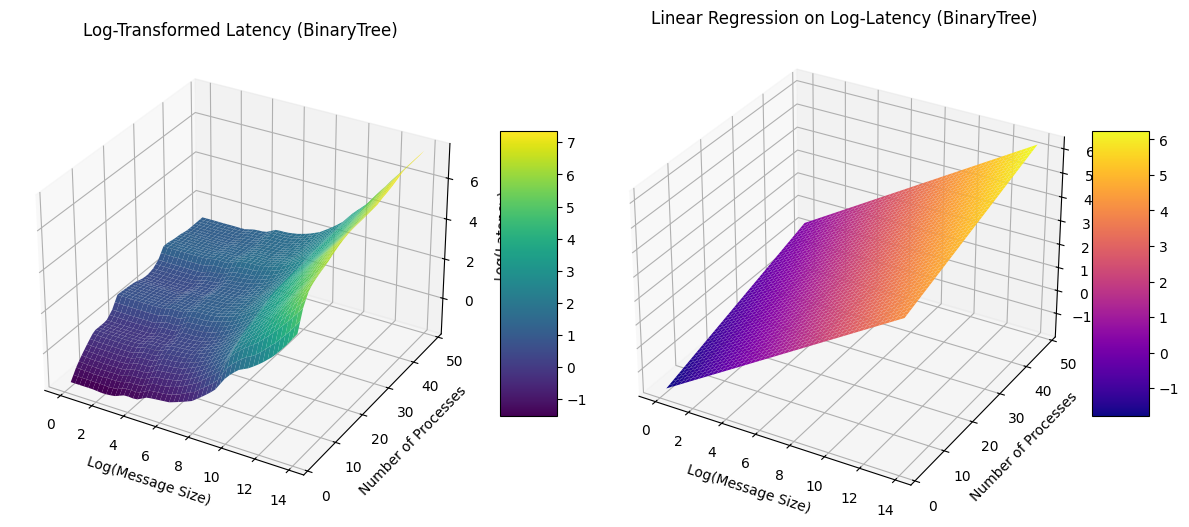

In [108]:
plot_log_latency('core', 'BinaryTree', bcast_binarytree)

Algorithm: BinaryTree
Linear Model Intercept: -1.6232
Linear Model Coefficients: [0.42716845 0.03672687]
R^2 Score (Log-transformed data): 0.8532


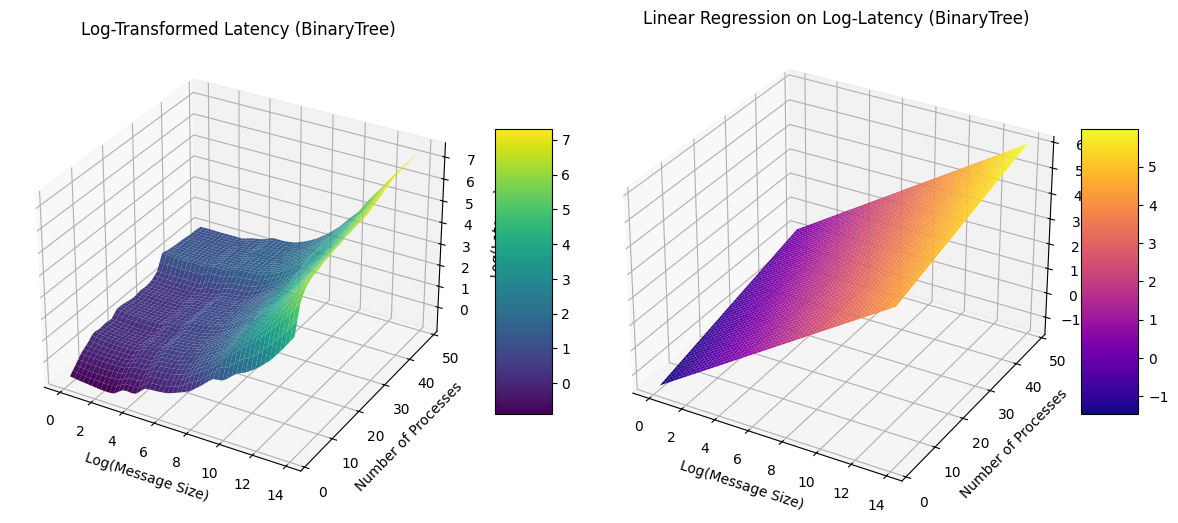

In [109]:
plot_log_latency('socket', 'BinaryTree', bcast_binarytree)

Algorithm: BinaryTree
Linear Model Intercept: -1.0918
Linear Model Coefficients: [0.40593974 0.0233626 ]
R^2 Score (Log-transformed data): 0.8444


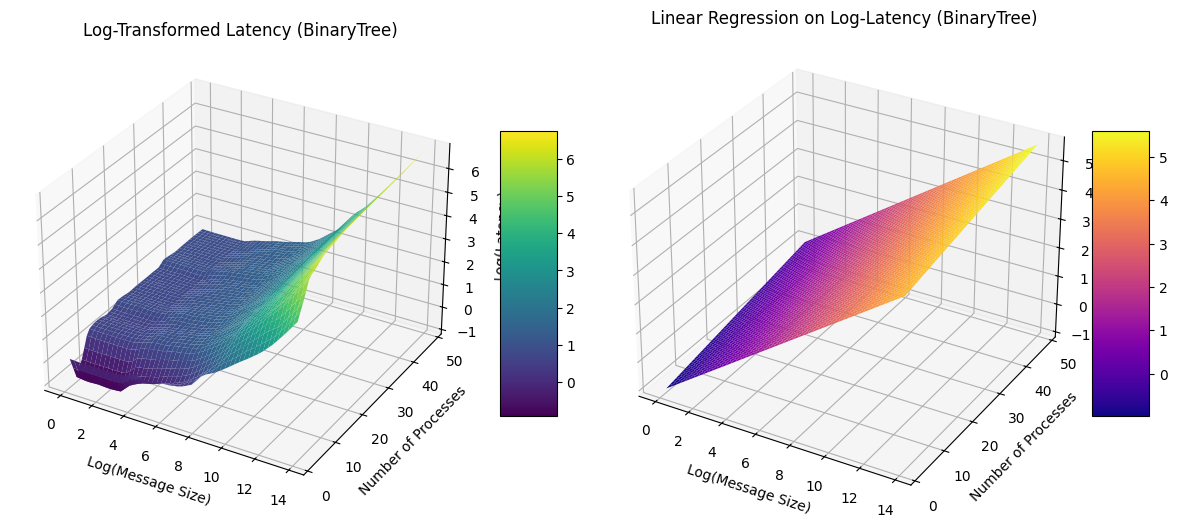

In [110]:
plot_log_latency('node', 'BinaryTree', bcast_binarytree)

Algorithm: Linear
Linear Model Intercept: -2.0162
Linear Model Coefficients: [0.44085892 0.04515416]
R^2 Score (Log-transformed data): 0.8311


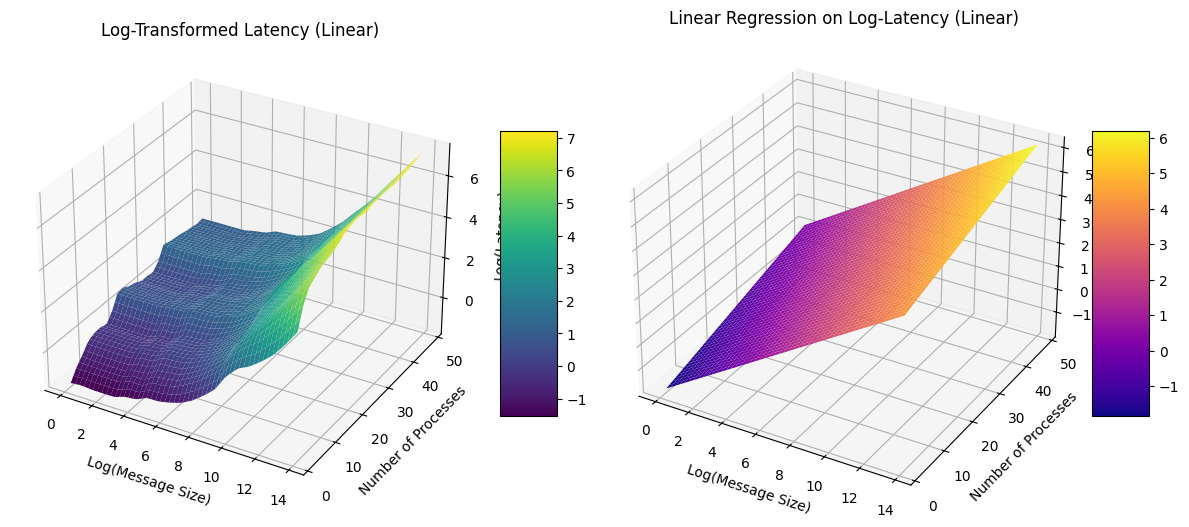

In [111]:
plot_log_latency('core', 'Linear', bcast_linear)

Algorithm: Linear
Linear Model Intercept: -1.5945
Linear Model Coefficients: [0.43217212 0.03257586]
R^2 Score (Log-transformed data): 0.8442


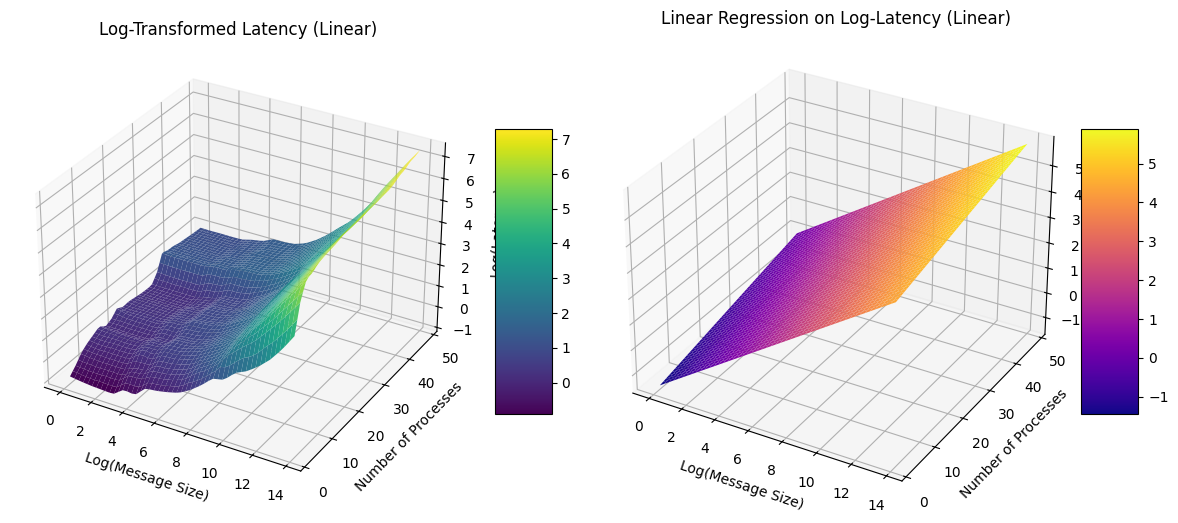

In [112]:
plot_log_latency('socket', 'Linear', bcast_linear)

Algorithm: Linear
Linear Model Intercept: -1.1004
Linear Model Coefficients: [0.40252865 0.02261813]
R^2 Score (Log-transformed data): 0.8349


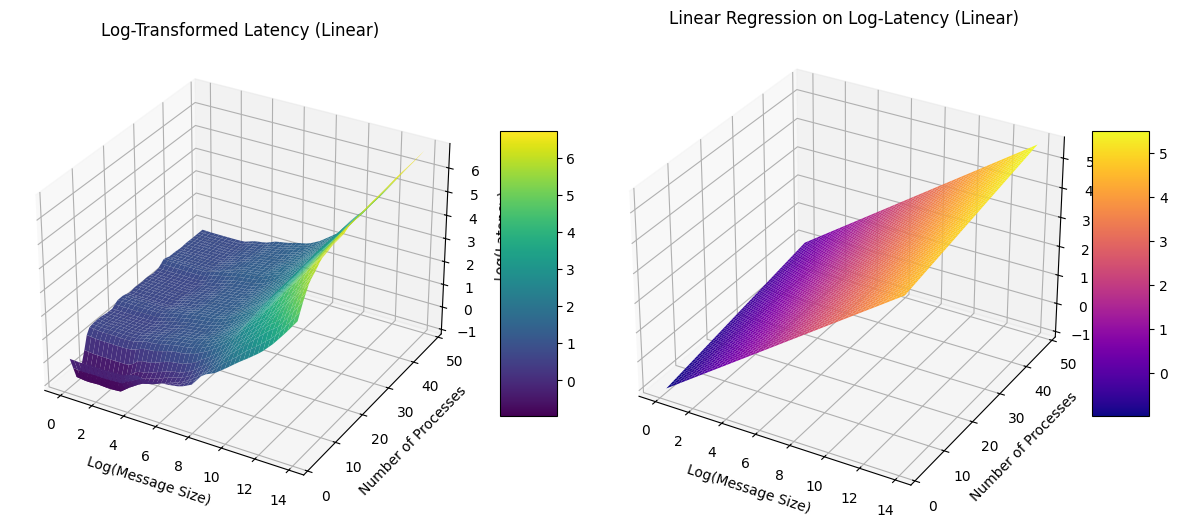

In [113]:
plot_log_latency('node', 'Linear', bcast_linear)

Algorithm: Chain
Linear Model Intercept: -1.9479
Linear Model Coefficients: [0.41992305 0.05197799]
R^2 Score (Log-transformed data): 0.8349


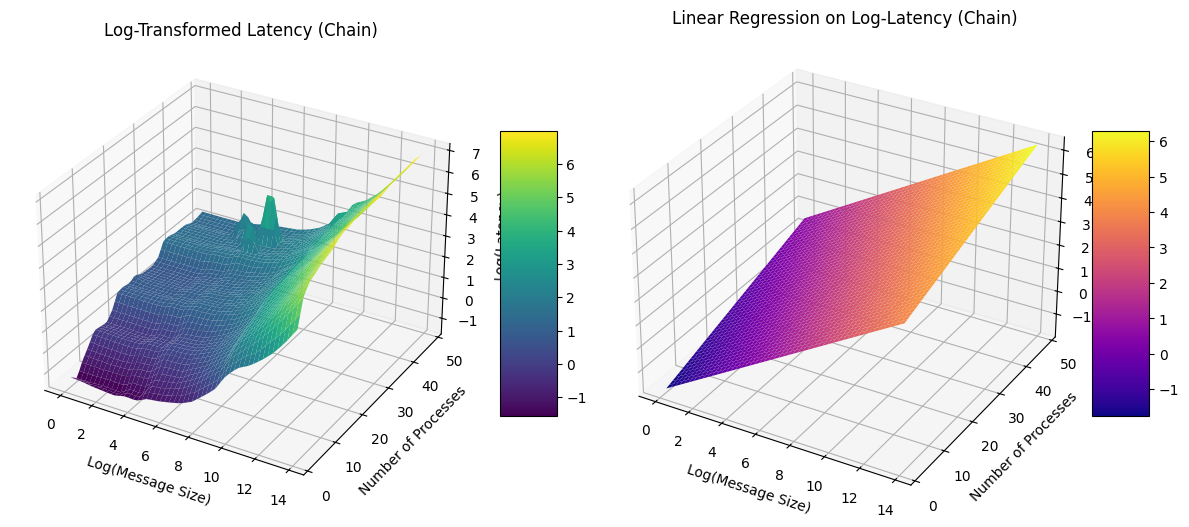

In [114]:
plot_log_latency('core', 'Chain', bcast_chain)

Algorithm: Chain
Linear Model Intercept: -1.5184
Linear Model Coefficients: [0.44106683 0.04570267]
R^2 Score (Log-transformed data): 0.8708


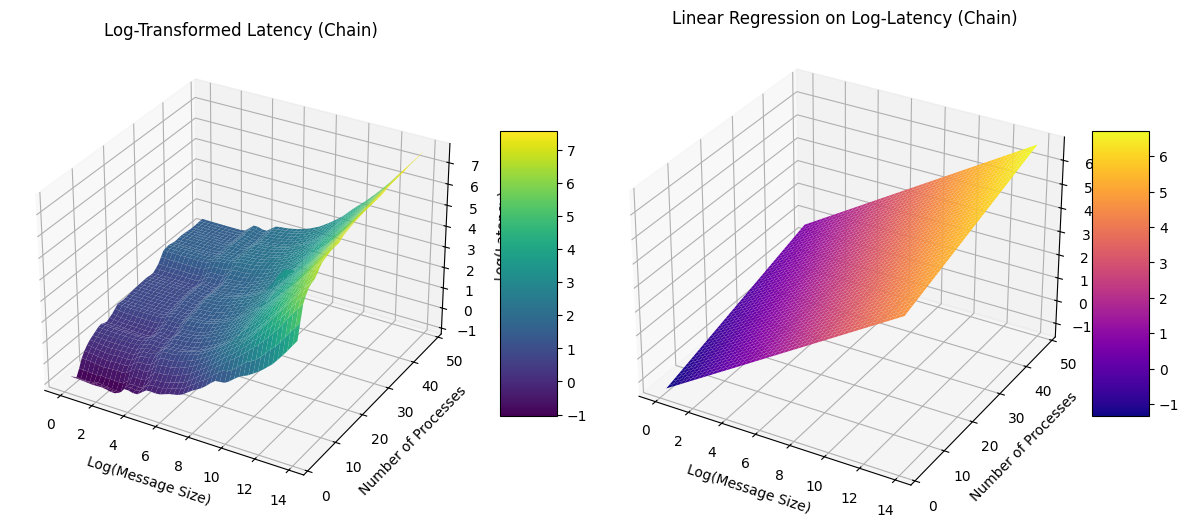

In [115]:
plot_log_latency('socket', 'Chain', bcast_chain)

Algorithm: Chain
Linear Model Intercept: -1.0892
Linear Model Coefficients: [0.37019469 0.0478641 ]
R^2 Score (Log-transformed data): 0.8380


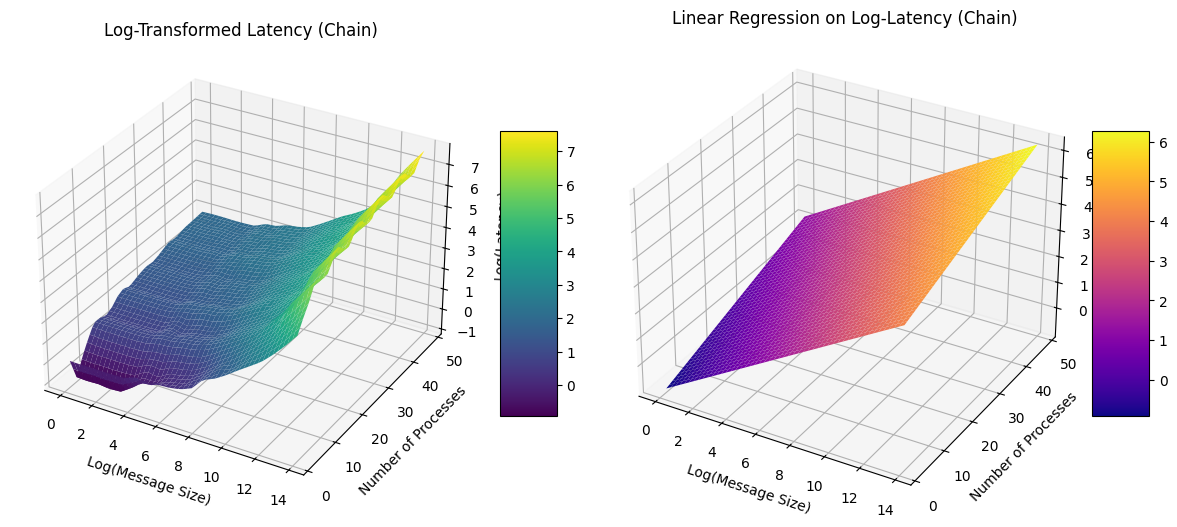

In [116]:
plot_log_latency('node', 'Chain', bcast_chain)